In [349]:
import pandas as pd
import numpy as np
import pickle

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

In [279]:
data = pd.read_pickle('book.pkl')
data.head(3)

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,"버지니아 울프 (지은이), 최설희 (옮긴이)",2022-03-10,,9791190710343,51373,국내도서>에세이>외국에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,"제인 오스틴 (지은이), 이신 (옮긴이)",2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,"메리 셸리 (지은이), 김나연 (옮긴이)",2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,국내도서>소설/시/희곡>영미소설,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0


In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70206 entries, 0 to 71638
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         70206 non-null  object
 1   author        70206 non-null  object
 2   pubDate       70206 non-null  object
 3   description   70206 non-null  object
 4   isbn13        70206 non-null  object
 5   categoryID    70206 non-null  int64 
 6   categoryName  70206 non-null  object
 7   salesPoint    70206 non-null  int64 
 8   adult         70206 non-null  bool  
 9   rank          70206 non-null  int64 
 10  fullDes       70206 non-null  object
 11  fullDes2      70206 non-null  object
 12  story         70206 non-null  object
 13  reviewrank    70206 non-null  int64 
 14  reviewtitle   70206 non-null  object
 15  review_w      70206 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 8.6+ MB


In [2]:
from eunjeon import Mecab

In [3]:
#from konlpy.tag import Mecab
mecab = Mecab()

In [280]:
df = data.copy()

In [135]:
# 작가 이름
authors = []
for author in df['author']:
    a = author.split('(')[0]
    authors.append(a)

In [136]:
df['author'] = authors

In [137]:
# categoryName
catagories = []
for category in df['categoryName']:
    try:
        b = category.split('>')[1]
    except:
        b = category.split('>')[0]
    catagories.append(b)

In [138]:
df['categoryName'] = catagories

In [139]:
# 카테고리 추출(cat)
cat = ['소설/시/희곡', '에세이', '자기계발']

df = df[df['categoryName'].isin(cat)]
df

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,0,0
1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,0,0
2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,0,0
17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,0,0
19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher
71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이
71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright
71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday


In [140]:
for i in range(len(df)):
    try:
        if (df['fullDes'][i] == '') & (df['fullDes2'][i] == ''):
            df = df.drop(index = i)
    except:
        pass

In [141]:
df['reviewtitle'].replace(0,'', inplace=True)
df['text'] = df['description'] + df['fullDes'] + df['fullDes2'] + df['reviewtitle']

In [142]:
df['text'] 

0        시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...
1        앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...
2        인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...
17       신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...
19       사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...
                               ...                        
71633    대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...
71634    20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...
71636    그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...
71637             [100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...
71638    '칭찬'과 '비난', '낙관'과 '비관'을 주제로, 우리가 관계 맺고 있는 수많은 ...
Name: text, Length: 54976, dtype: object

In [144]:
#df.to_pickle('book1.pkl', protocol=4)

In [145]:
df1 = df.copy()
df1.columns

Index(['title', 'author', 'pubDate', 'description', 'isbn13', 'categoryID',
       'categoryName', 'salesPoint', 'adult', 'rank', 'fullDes', 'fullDes2',
       'story', 'reviewrank', 'reviewtitle', 'review_w', 'text'],
      dtype='object')

# 1. 전처리
## 1. 토큰화
- 형태소 기반 토큰화 -> mecab

- 1번째 text 

In [350]:
df1 = pd.read_pickle('book1.pkl')

In [351]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [352]:
df1['text'] = df1['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')

<ipython-input-352-8e3be58aaacb>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['text'] = df1['text'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',' ')


In [353]:
results = []

for i in df1['text']:
    fullDes = mecab.pos(i)
    words_all = []
    for j in fullDes:
        
        if (j[1] == 'NNG') | (j[1] == 'NNP'):
            words_all.append(j[0])
    results.append(words_all)

In [354]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

In [69]:
galaxy_word2vec = Word2Vec(results, min_count=1)

In [ ]:
galaxy_word2vec.wv.most_similar("자연",topn=30)

In [219]:
for key in key_list:
    a = []
    keyword = galaxy_word2vec.wv.most_similar(key,topn=30)
    a.append(key)
    for i in range(len(keyword)):
        a.append(keyword[i][0])
    df_key[key] = a

In [253]:
for i in range(len(df2)):
    for key in df_key['열정']:
        for j in range(20):
            try:
                if df2['keyword'][i][j] == key:
                    print(df2['title'][i])
            except:
                pass

오만과 편견
프랑켄슈타인
집착
원서발췌 신선전
탐닉
희망을 모아 나누는 우리 - 농업 공동체 ‘해 뜨는 마을’ 이야기
활써클 대마법사 9 - 완결
활써클 대마법사 9 - 완결
전능하신 영주님 11
할아버지는 군인이었다
제로의 대현자 2 - ~ 젊어진 최강의 현자는 정체를 숨기고 출세한다 ~, Shift Novel
세상의 끝과 부재중 통화 - 차마 하지 못한 말들은 모두 어디로 가는 걸까
돈의 맛 - 대부업계 회장님이 빚쟁이 영업사원에게 알려주는 진짜 솔직한 돈 이야기
울프가 읽은 작가들
중국의 유년시절 - 쉬보젠 시선
우리 시대의 독자 - 박종석의 독서궁리
내일은 조금 달라지겠습니다 - 한민용이 전하는 희망의 기록
별의 노래
다빈치 코딩 - 당신의 미래를 바꾸는 실전 코딩 전략
평화시장 까치 - 열여섯 동갑내기 어린 부부가 걸어온 반백년 세월
The Earthian Tales 어션 테일즈 No.2 - Time Travel with You
먹는 것과 싸는 것
배비장 - 민담으로 전해진 에로틱한 해학소설
언제나 인생은 내 맘 같지 않았다
감사하면 보이는 것들
노엘의 다이어리
은하철도의 밤 (미니북)
귤색 헤드라이트 - 제주에서 나고 자란 그림 작가 이현미의 적당히 나른한 행복에 관한 이야기
이름 없는 여자
은하철도의 밤
감성 콘텐츠 - 롱런 브랜드를 만드는 35가지 콘텐츠 공식
클라리넷 월드
2022 오늘의 좋은 시
세상을 바꾸는 비밀의 열쇠
슬기로운 수의대생활 (칼라본)
피어오르는 빛 속에서
Light & Shadow
껍데기 벗어, 임마!
껍데기 벗어, 임마!
껍데기 벗어, 임마!
검은색 사륜마차
재와 같이 흩날려지더라도
별이 있는 곳을 향하여
공부가 가장 쉬웠어요
[큰글자책] 우리, 행복합시다 - 102세, 긴 삶의 여정 뒤에 기록한 단상들
매너 레벨 올리기 - 삶이 갓생으로 술술 풀리는 사회생활
[큰글자책] 햇빛은 찬란하고 인생은 귀하니까요 - 밀라논나 이야기
수원詩人 9집 - 2022년
부의 메커니즘
더 잘하고 싶어서, 더 잘 살고 싶어서 - 나를 단단하게

평일도 인생이니까 - 주말만 기다리지 않는 삶을 위해
요리는 감이여 - 충청도 할매들의 한평생 손맛 이야기
에세이 만드는 법 - 더 많은 독자를 상상하는 편집자의 모험
존재만으로 빛나는 - 너에게 눈부신 빛이 나기 시작했다 우리 처음 만난 그날처럼
좋은 말씀 - 법정 스님 법문집
월든
밥은 먹고 다니냐는 말 - 농촌사회학자 정은정의 밥과 노동, 우리 시대에 관한 에세이
꼬리 - 시베리아 숲의 호랑이, 꼬리와 나눈 생명과 우정의 이야기
한번쯤, 큐레이터 - 박물관으로 출근합니다
숨은 냥이 찾기 - 우리보다 조금 더 따뜻한 고양이의 시간
우주가 나를 돕고 있다! - 점점 더 밝고 풍요로워지는 당신을 위한 확언
그렇게 말해줘서 고마워 - 나를 지키고 관계를 지키는 일상의 단단한 언어들
무라카미 T - 내가 사랑한 티셔츠
관계를 정리하는 중입니다 (루나 에디션)
관계를 정리하는 중입니다 (루나 에디션)
나무야 나무야 - 국토와 역사의 뒤안에서 띄우는 엽서
일기시대 - 문보영 에세이
구멍가게, 오늘도 문 열었습니다
구멍가게, 오늘도 문 열었습니다
먼길로 돌아갈까?
50부터 뻗어가는 사람 시들어가는 사람 - 어떤 인생이 될지는 50부터 판가름 난다
프루스트가 우리의 삶을 바꾸는 방법들 - 개정판
신과 나눈 이야기 3
나는 할 수 있어 - 삶을 크게 변화시키는 긍정 확언 사용법, 개정판
빈 일기 - 침묵을 넘어 진화하는 여자들
오늘의 나를 안아주세요 - 날마다 욕구 명상, 비폭력대화로 연습하는 자기 돌봄 100일
내향적이지만 할 말은 많아서 - 그런 당신을 위한 블로그라는 세계
태양의 저쪽 밤의 이쪽 - 작가를 따라 작품 현장을 걷다
푸른 밤
새벽은 이별에게 가혹하고
시나리오 쓰고 있네
시나리오 쓰고 있네
너희가 혼술을 아느냐
애쓰지 않고 편안하게 (20만 부 기념 에디션)
만남은 지겹고 이별은 지쳤다 (10만 부 기념 리커버 에디션) - 색과 체 산문집
만남은 지겹고 이별은 지쳤다 (10만 부 기념 리커버 에디션) - 색과 체 산문집
지금 이대로 좋다 (2020 여름 리

알렉스 퍼거슨 나의 이야기 - 개정증보판
마르셀 프루스트 : 독서에 관하여
오스카리아나 - 오스카 와일드의 찬란한 문장들
문득 사람이 그리운 날엔 시를 읽는다 2
죠르디 24시
정원 가꾸기의 즐거움 - 헤르만 헤세 산문집
자기신뢰의 힘 - 자유롭고 강한 마음의 비밀
내가 필요하면 전화해
실컷 울고 나니 배고파졌어요 (든든 에디션) - 사는 게 버거운 당신에게 보내는 말
정원 가꾸는 사람의 열두 달
제가 한번 해보았습니다, 남기자의 체헐리즘
일상이 미니멀 - 미니멀 너머 미니멀
다시 집으로 가는 길
다시 집으로 가는 길
다시 집으로 가는 길
밀라노, 안개의 풍경
밤은 길고, 괴롭습니다 - With Frida Kahlo
다자이 오사무 내 마음의 문장들
카프카의 일기
아무튼, 택시 - 매 순간 우리는 원하지도 않았고 상상하지도 못했던 지점들을 지난다
아무튼, 택시 - 매 순간 우리는 원하지도 않았고 상상하지도 못했던 지점들을 지난다
나무에게 배운다 - 비틀린 문명과 삶, 교육을 비추는 니시오카 쓰네카즈의 깊은 지혜와 성찰
나무에게 배운다 - 비틀린 문명과 삶, 교육을 비추는 니시오카 쓰네카즈의 깊은 지혜와 성찰
나무에게 배운다 - 비틀린 문명과 삶, 교육을 비추는 니시오카 쓰네카즈의 깊은 지혜와 성찰
이수부 키친, 오늘 하루 마음을 내어드립니다
참꽃이 피면 바지락을 먹고 - 그릇 굽는 신경균의 계절 음식 이야기
베네치아의 종소리
또 나만 진심이었지 - 인생고민 측면돌파 해답집
시민 불복종
헐하우스에서 20년 - 미국 여성 최초 노벨평화상 수상자 제인 애덤스의 자전적 에세이
진심의 공간 - 나의 마음을 읽다 나의 삶을 그리다
나는 내가 잘됐으면 좋겠다
8코기네 - 함께라서 행복한 웰시코기 대가족의 리틀 포레스트
가끔은 그저 흘러가도 돼
순간의 철학 - 찰나에서 시작하여 영원으로 깊어지는 인문학 이야기
간격의 미
김과장 직장백서
틱낫한의 먹기 명상 How to Eat - 언제 어디서든 나만의 힐링 명상
걱정 말아요, 그대 - 김제동과 사람들, 다정한 위로를 건네는 시간

작곡가입니다만 - 9년 차 작곡가의 좌충우돌 이야기
우리 이만 헤어져요 - 이혼 변호사 최변 일기
역마
자박자박 걸어요 - 내 삶에서 챙겨야 할 소중한 것들을 위해
세계 문학 전집을 읽고 있습니다 1
누울래? 일어날래? 괜찮아? 밥먹자
길은 언제나 내게로 향해 있다 - 어제는 아프고 오늘은 슬픈 이들에게 전하는 마음 수행 산문집
행복을 찾아서
유미의 일기장 - 운명은 없어, 선택만 있을 뿐이야
살다, 읽다, 쓰다 - 세계문학 읽기 길잡이
나만큼 널 사랑할 인간은 없을 것 같아 - 마음껏 사랑해도 그 이상을 돌려주는 멍냥이들에게
사랑할 수밖에 없는 사람 - 가장 예쁜 마음을 가장 예쁘게 담아서 당신에게
다정하게
마쓰모토 세이초 걸작 단편 컬렉션 - 중
괜찮냐고 너는 물었다 괜찮다고 나는 울었다
아흔 살 슈퍼우먼을 지키는 중입니다
결혼 탈출
사랑할 날이 얼마나 남았을까 - 당신, 그리고 나 자신을 위한 용서와 사랑의 시간
빌 브라이슨 발칙한 미국학 - 미국인도 모르는 미국 이야기
다시, 봄 - 장영희의 열두 달 영미시 선물
나이 들수록 인생이 점점 재밌어지네요
당신이 잠든 사이에 Photo Essay
약국 안 책방 - 아직 독립은 못 했습니다만
유일한, 평범 - 최현정의 마음 성장 에세이
예언자
제임스 앨런의 생각의 지혜
아름다운 사유
[큰글씨] 처음처럼  - 신영복의 언약, 개정신판
생각하기 / 분류하기
빛과 안개 - light and fog
해 뜨는 나라의 공장
남부군 - 최초로 공개된 지리산 빨치산 수기, 개정판
누가 시를 읽는가
뭐 어때!
밀가루는 못 먹지만, 빵집을 하고 있습니다 - 한남동 글루텐프리 & 비건 빵집 써니브레드 이야기
올더스 헉슬리 지각의 문.천국과 지옥
아무튼, 스윙 - 울고 싶은 마음이 들면 스윙을 떠올린다
돌아보니 삶은 아름다웠더라 - 모든 어른 아이에게 띄우는 노부부의 그림편지
나의 두려움을 여기 두고 간다
간호사를 부탁해 - 그냥 일 쫌 하는 보통의 간호사로 살아가기
노인이 되지 않는 법
빗방울이 후두둑
오늘 너무 슬픔
인생에서 공

[큰글자책] 우리 누이 - 그림책
나무를 만나다 - 그 굳고 정한 삶의 이야기
나무를 만나다 - 그 굳고 정한 삶의 이야기
상하이에서 온 여인 - 장애령 산문선
아름다운 선물
우리말 소망 - 나만의 주문을 외다!
여성 경호원 고은옥의 Nowhere
본래 그 자리 - Les Essais 오래된 나의 노트
언제라도 티타임
한참을 울어도 몸무게는 그대로
거북이가 된 고슴도치
고양이, 내 삶의 마법
힘 빼고 스윙스윙 랄랄라 - 오늘도 나이스 샷을 꿈꾸는 보통 사람의 골프 이야기
조금 늦어도 괜찮아
이차전지 성장 이야기와 대기업 오래 다니기
해볼 건 다 해봤고, 이제 나로 삽니다 - 15인의 여성 작가들이 말하는 특별한 마흔의 이야기
화장실에서 보는 책
하루 한 줄 마음산책 - 가슴으로 읽는 감동 명언 365
자유로운 여행자의 소지품 목록
엄마의 꽃밥
My Dear Dog, MOMO
수긍과 창조 - 유양석 에세이
엄마의 인생은 나에게 내일을 살아갈 기적이 되었다 - 내가 가장 사랑했던 엄마의 이야기
[POD] 백번 도전 끝에 사회복지사로 이룬 꿈
라마르틴의 예루살렘
고마워요 - 백성현 포토 에세이
나를 찾아가는 직업 - 단절된 꿈을 글로 잇는 삶
어제는 슬펐지만 오늘은 잔잔하게 - 괜찮은 삶을 살고 싶어 남긴 마음 치유 이야기
울프가 읽은 작가들
귤색 헤드라이트 - 제주에서 나고 자란 그림 작가 이현미의 적당히 나른한 행복에 관한 이야기
야훼 - 신이 전 세계 인류에게 내리는 경고와 메시지
엄마가 떠난 날
[큰글자도서] 아무도 미워하지 않는 개의 죽음 2 
아마도 위로가 될 거야
만 권의 기억 데이터에서 너에게 어울리는 딱 한 권을 추천해줄게 - 책을 무기로 나만의 여행을 떠난 도쿄 서점원의 1년
나답게 산다 - 우리 시대 문화예술인들이 말하는 나답게 사는 20가지 방법
심리학 편지
마음의 민낯 vol.3 : 내 얼굴이 아직도 익숙해지질 않습니다
젊은날의 초상 (포켓북)
성공과 행복에 관하여 - 인생의 가운데 길에 선 나를 위해 하루 한 페이지‘읽는 일기’
교관의 일기

영원성의 역사
그럴 땐 바로 토끼시죠 - 하기 싫은 일은 적당히 미루고 좋아하는 일은 마음껏 즐기는 김토끼 묘생의 기술!
스스로 빛나는 배우를 찾습니다
한 걸음씩 걸어서 거기 도착하려네
다시, 여행을 가겠습니다
내 나이가 어때서? - 65세 안나 할머니의 국토 종단기, 2009년 네이버 오늘의 책 선정
나답게 살고 있냐고 마흔이 물었다 - 설레거나 시시하거나 이대로가 좋은 나이
처음의 마음으로 돌아가라 - 개정판
웃어넘기지 않는다 - 페미니스트 킬조이가 보내는 쪽지
그림은 위로다 - 곁에서 친구처럼 위안이 되어주는 그림 이야기
파페포포 리멤버 - 우리가 잃어버린 것들
추리소설 속 트릭의 비밀
추리소설 속 트릭의 비밀
박재동의 손바닥 아트
다카페 일기 2 - 행복이란, 분명 이런 것
나를 외치다
말과 마음 사이
시작할 때 그 마음으로 - 법정이 우리의 가슴에 새긴 글씨
시작할 때 그 마음으로 - 법정이 우리의 가슴에 새긴 글씨
나만 아무 일도 일어나지 않는다 - 그 나이 먹은 당신에게 바치는 일상 공감서
상뻬의 어린 시절
직업으로서의 음악가 - 어느 싱어송라이터의 일 년
노년에 관하여
당신과 함께라면 말이야 - 1년차 새내기 남편 오상진의 일기
무탈한 오늘
캄포 산토
캄포 산토
작가와 술 - 작가들의 이유 있는 음주
여백을 채우는 사랑
스무살 청춘! A+보다 꿈에 미쳐라
마음을 안아준다는 것 - 말 못 하고 혼자 감당해야 할 때 힘이 되는 그림책 심리상담
오늘도 좋아하는 일을 하며 삽니다 - 어른을 위한 그림책방, 카모메 이야기
클로징 멘트를 했다고 끝은 아니니까 - 미쳤지, 내가 퇴사를 왜 해서!
100세 철학자의 철학, 사랑 이야기 - 젊은 세대와 나누고 싶은
문학으로 읽는 조용필
카운터 일기 - 당신이 두고 간 오늘의 조각들
인생사용설명서 두 번째 이야기 - 내 삶을 희망으로 가득 채우는 일곱 가지 물음
그리운 것들은 산 뒤에 있다
마음에도 근육이 붙나 봐요
차의 기분 - 인생의 맛이 궁금할 때 가만히 삼켜보는
희망을 심다 - 박원순이 당신께 드리는 희망과

나는 21세기 이념의 유목민 - 예일대학에서 보내온 평양 교수의 편지
혼자가 좋은데 혼자라서 싫다
스물 셋, 지금부터 혼자 삽니다
나의 스웨덴에서
레스큐 - 삶과 죽음의 경계에서, 한 소방관이 기억하는 그날의 기록
꿈은 토리노를 달리고
참 좋은 당신을 만났습니다, 두 번째 - 따뜻한 온기가 필요한 사람들을 위한 감동 에세이
브루클린 오후 2시 - 낯선 곳에서 시작한 두 번째 삶 이야기
나답게 살다 나답게 죽고 싶다 - 품위 있는 죽음을 위한 종활 일기
나는 걷는다 끝. - 리옹에서 이스탄불까지 마지막 여정
마음에 새기는 명품 명언
하루가 끝나면, 따뜻하게 안아주세요 - 작지만 확실한 행복의 순간들
지구 위의 작업실
사랑할 땐 별이 되고 - 개정판
간소한 삶, 아름다운 나이듦 (리커버 에디션)
애도예찬 - 문학에 나타난 그리움의 방식들
이상한 부엌의 마법사 - 어느 푸드 스토리텔러가 차리는 음식과 사람 이야기
어쩌다, 승무원 - 서비스와 안전 사이, 아슬했던 비행의 기록들
나는 매일 엄마와 밥을 먹는다 - 스머프할배의 세상에서 가장 맛있는 밥상 일기
사막의 우리집
편안하고 사랑스럽고 그래 Love TMI Book
어머니와 나
미야베 미유키 에도 산책
잘 먹고 싶어서, 요리 편지 - 나만을 위한 우편 레시피 상담
잘 먹고 싶어서, 요리 편지 - 나만을 위한 우편 레시피 상담
이왕 시작한 거 딱, 100일만 달려 볼게요
동주, 소월, 용운, 영랑의 글
잊을 수 없는 밥 한 그릇
10살 듬직이, 살아온 기적 살아갈 희망
반려 물건 - 웬만하면 버리지 못하는 물건 애착 라이프
내 아침 인사 대신 읽어보오
국경의 도서관 - 황경신의 이야기노트
엄마, 나 또 올게 - 아흔여섯 어머니와 일흔둘의 딸이 함께 쓴 콧등 찡한 우리들 어머니 이야기
문재인 스토리 - 그 남자, 문재인에 대해 알고 싶은 56가지 이야기
홍천강변에서 주경야독 20년 - 역사지리학자 최영준의 농사일기
나는 어제 개운하게 참 잘 죽었다 - 상처 입은 마음의 재생을 돕는 조주록 읽기
이탈리아 기행 2
아무 

산 위의 신부님
피아노를 치며 생각한 것들 - 좋아하는 일을 좇는 삶에 관하여
피아노를 치며 생각한 것들 - 좋아하는 일을 좇는 삶에 관하여
피아노를 치며 생각한 것들 - 좋아하는 일을 좇는 삶에 관하여
카메라와 부엌칼을 든 남자의 유럽 음식 방랑기
사랑하면 보인다 - 다큐 3일이 발견한 100곳의 인생 여행
문득, 묻다 두 번째 이야기 - 지성과 감성을 동시에 깨우는 일상의 질문들
새들은 과외수업을 받지 않는다
진보적 노인 - 나는 58년 개띠, '끝난 사람'이 아니다
저는 이 정도가 좋아요 - 5년 차 프리랜서의 자리가 아닌 자신을 지키며 일하는 법
엄마, 우리 힘들 때 시 읽어요 - 엄마한테 읽어주는 시와 에세이
엄마, 우리 힘들 때 시 읽어요 - 엄마한테 읽어주는 시와 에세이
하늘빛 사람들
하늘빛 사람들
좋은 것을 아껴두려는 성질 - 개정판
여자의 모든 인생은 20대에 결정된다 - 실천편 - 인생의 좌표를 행복으로 이끄는 똑똑한 여자들의 선택
단순하게 사니, 참 좋다 - 미니멀 리스트가 들려주는 단순한 삶의 미학
심영순, 고귀한 인생 한 그릇 - 평범한 인생을 귀하게 만든 한식 대가의 마음 수업
지금이 네 인생에서 가장 중요한 순간이다 - 당신의 삶을 채워줄 아주 특별한 인생수업
아직 피어 있습니까, 그 기억 - 이정하 베스트 詩선집
자연이 우리에게 준 1001가지 선물
감정도 디자인이 될까요? - 부정에서 긍정으로, 내 감정 내 마음대로
다이어트에 진심입니다 - 150cm, 88kg의 여자가 44kg을 덜어내고 얻은 것들
무인도에 살 수도 없고 - 인간에게 성숙이란 무엇인가
괜찮고 괜찮을 나의 K리그 - 당신에게 가장 가까운 축구장에서
헤세가 들려주는 나비 이야기 - 반짝임과 덧없음에 대하여
괜찮다 괜찮다 다 괜찮다
이제는 조금 알 것도 같고 - 900일간의 여정이 내게 일러준 것들
바람구두를 신은 피노키오 - 세계 인형극 축제 속에서 찾은 반딧불 같은 삶의 순간들!
바람구두를 신은 피노키오 - 세계 인형극 축제 속에서 찾은 반딧불 같은 삶의 순간들!

세상 그 어떤 것도 나를 흔들 수 없다 - 라이언 킹 이동국 90분 축구 드라마는 이제부터 시작이다
번개탄에 고기를 구워 먹었다
이곳에 볕이 잘 듭니다 - 도시에서 사일 시골에서 삼일
누구나 한 번쯤 계단에서 울지 - 평범한 어른이 오늘을 살아내는 방법
누구나 한 번쯤 계단에서 울지 - 평범한 어른이 오늘을 살아내는 방법
오늘의 인사총무, 맑음 - 중소기업 인사총무를 말하다
텨댜 : 마음 가는 대로
낯선 익숙함을 찾아서 - 김명희의 문학기행
내가 단단해지는 시간들 - 같이 읽기의 즐거움, 함께 읽기의 따뜻함
'시인' 임경남의 나 데리고 잘 사는 법
노을을 바라보며
조지프 앤턴 - 살만 루슈디 자서전
공부 이야기
청춘예찬
청춘예찬
냄새와 그 냄새에 관한 기묘한 이야기 - 이 세상의 냄새를 상상하는 시간들
참 좋은 당신을 만났습니다, 다섯 번째 - 순간을 더 특별하게 만드는 공감 에세이
닿을 듯 닿을 수 없음에
잊지 않고 남겨두길 잘했어 - 29CM 카피라이터의 조금은 사적인 카피들
잊지 않고 남겨두길 잘했어 - 29CM 카피라이터의 조금은 사적인 카피들
아무 생각 없이 마음 편히 살고 싶어 - 마음속 때를 벗기는 마음 클리닝 에세이
노견 만세 - 저마다 생애 최고의 마지막 나날을 보내는 노견들에게 보내는 찬사
이양하 수필선 - 을유라이브러리 4
강릉이 취향이라서요 - 강릉살이 12년 차, 강릉에 진심인 일러스트레이터가 소개하는 몸과 마음이 저절로 머물게 되는 강릉 명소 20
크리슈나무르티와 함께한 1001번의 점심 식사
세상의 모든 소린이에게 - 사랑의 시작, 입양을 인터뷰하다
야구생각 - 나는 야구에서 인생을 배운다
내일과 오늘이 같더라도 다른 일상 - 한번쯤 살아보고 싶은 그녀의 방
내가 나를 위로할 때
나의 순결한 행성
혼자가 더 편한 사람들의 사랑법
당신이 매일매일 좋아져요
당신이 매일매일 좋아져요
산돌 키우기
맨땅에 캠핑 - 무작정 캠핑에 뛰어든 캠린이의 영혼 가출 현장 일기
우리가 서로에게 미래가 될 테니까
홋카이도, 여행, 수다 - 그 여자의 킨포크

100°c 선물
연애실험대상 2 - 연애를 하면서 힘들고 싸우는 모든 상황들
아이는 잘 키우고 싶지만 경력도 포기하고 싶지 않아
이까짓, 털 - 나만 사랑하는 너
물감을 사야 해서, 퇴사는 잠시 미뤘습니다 - 우리에겐 애쓰지 않고도 사랑하며 할 수 있는 일이 필요하다
내 인생이 흔들린다 느껴진다면
집에 다녀오겠습니다
그때, 타이완을 만났다 - 삶이 깊어지는 이지상의 인문여행기
간호사, 세상 밖으로 - 서울시간호사회원의 코로나19 경험 나누기
아 난 이런 어른이 될 운명이었던가 - 30대, 변하는 것들에 의연해지는 시간
아 난 이런 어른이 될 운명이었던가 - 30대, 변하는 것들에 의연해지는 시간
나이 드는 맛
나는 페미니스트인가 - 100년후 독자에게 던지는 물음
집이 사람이다 - 그 집이 품고 있는 소박하고 아담한 삶
뉴욕의 고양이들
저 절로 가는 사람
저 절로 가는 사람
아모르파티 - 너의 운명을 사랑하라
골목 바이 골목
나에게서 내리고 싶은 날
나에게서 내리고 싶은 날
그대는 그대가 가야 할 길을 알고 있는가
런더너
지금 저지르지 않으면 후회할 일들
좋은 일 - 90일간의 행복쓰기 프로젝트
아무래도 방구석이 제일 좋아
하필 그리움을 당신에게 엎질렀다
일상의 살인 (리커버)
비정규 아티스트의 홀로그림 - 밥장이 그려내는 무한 상상 여행
돌아갈 때가 되면 돌아가는 것이 진보다
요코 씨의 말 4 - 후후훗
요코 씨의 말 4 - 후후훗
금강경 독송과 마음 바치는 법 - 시대의 활불 백성욱 박사 탄신 123주년 기념 문집
금강경 독송과 마음 바치는 법 - 시대의 활불 백성욱 박사 탄신 123주년 기념 문집
아이슬란드에서는 행복을 묻지 않는다 - 경향 70주년 대기획 지구촌 행복기행 보고서
김탁환의 원고지 - 어느 예술노동자의 황홀한 분투기, 2000~2010 창작일기
김탁환의 원고지 - 어느 예술노동자의 황홀한 분투기, 2000~2010 창작일기
자연의 밥상에 둘러앉다 - 자연과 인간의 생명을 살리는 윤구병의 생태 에세이
좋아하는 마음만큼 재능도 주셨어야죠 - 변

편지할게요 - 낯선 이름에게 전하는 나의 은밀하고 소란한 편지
153일 인생을 걷다 - 두 발로 전국 일주
누구에게나 오늘은 처음이니까
쓰다듬고 싶은 모든 순간 - 스쳐 지나간 것들이 남긴 이야기
쓰다듬고 싶은 모든 순간 - 스쳐 지나간 것들이 남긴 이야기
보고 싶어서, 가고 싶어서 - 내게 왜 여행하느냐 묻는다면
마음이 예뻐지는 수필 - 커플책: 연보라
사랑에 관해 쓰지 못한 날
고독에 시비를 걸다
고독에 시비를 걸다
딱 한 달만 아무것도 하지 않고
되찾은 : 시간 - 프루스트의 서재, 그 일년의 기록을 통해 되찾은 시간
파리에 비가 오면
남심탐구 여심탐구 - 달라도 너무 다른 남녀의 진짜 속마음
사랑의 백가지 이름
다섯친구 - 세상에서 가장 먼저 만나야 할 내 인생의 동반자
더 크라잉 북 - 지극한 슬픔, 은밀한 눈물에 관하여
어쩌다 백두대간 - 충청도 촌눔덜과 함께한 백두대간 동행 종주기
우리 함께 살아갑니다, 지금 이곳에서 - 생명과 사랑을 찾아 전 세계로 떠난 11명 글로벌협력의사들의 이야기
마음의 평균율
오늘 서강대교가 무너지면 좋겠다 - 14년 차 방송작가의 좌충우돌 생존기
생각 줍기
미완성 - 느리게, 아름답게 이루는 삶에 관하여
상우일기 - 왕따에서 세월호까지 소년의 눈에 비친 대한민국 일상사
사카구치 안고 산문집
유쾌한 가족 레시피 - 가족 편지 써주는 그녀의 심리 처방 30
세상을 보는 지혜 (양장)
언니의 아지트 - 편집장 신혜연의 공간 큐레이션 북
길 위에서 배운 것들 - 길 위의 철학자 신정일의 아프게 아름다운 인생 독학기
길 위에서 배운 것들 - 길 위의 철학자 신정일의 아프게 아름다운 인생 독학기
제주도에서 한 번 살아볼까? - 제주살이, 낭만부터 현실까지
제주도에서 한 번 살아볼까? - 제주살이, 낭만부터 현실까지
내겐 아직, 연애가 필요해
조금씩, 가까이, 너에게 : 파스텔뮤직 에세이북
네가 아무리 외로워도 누군가에겐 잊혀지지 않는 사람
기적 같은 한순간 - 명사들의 인생을 송두리째 바꿔 놓은 결정적인 한순간
전원의 쾌락 - V

사라져가는 것들 잊혀져가는 것들 2 - 떠나가는 것은 그리움을 남기네
생의 변방에서
진심을 말해버렸다
지금 이 순간, 당신이 가장 소중합니다 - 기타로 노래하는 스님이 들려주는 또 다른 이야기
나무 집 예찬
보는 것을 보는 눈이 행복하다
희망의 선택 - 사람이 희망이다
까마귀
토닥토닥 - 당신의 굽은 등을 쓸어내리며
빛을 그리는 그림자 - 류현진의 MLB정복기 그리고 류현진의 그림자, 마틴 김과의 99가지 이야기
김석기의 길 - 경찰 인생 30년, 그리고 새로운 도전
역사의 언덕에서 1 - 엑소더스
삶과 문학의 경계를 걷다 - 김종회 문화담론
삶과 문학의 경계를 걷다 - 김종회 문화담론
치유, 진짜 나를 찾게 된 순간
너는 어떻게 나에게 왔니 - 500days in Ireland
너는 어떻게 나에게 왔니 - 500days in Ireland
내 인생의 글쓰기
이 세상을 다녀가는 것 가운데 바람 아닌 것이 있으랴
이 세상을 다녀가는 것 가운데 바람 아닌 것이 있으랴
클래식 클래스
사자생어
예스터데이 - 추억의 1970년대
If Not Now When 지금 아니면 언제
화장 예찬
초원, 내 푸른 영혼
산거일기
허락하지 않는 길 - 누구도 허락하지 않는 평범치 않은 나만의 길을 걷다
삶의 변곡점, 마음 다이어트가 필요해
오십이지만 신혼입니다
괜찮게 살아온 거야 오늘도 애쓴 너라서 - 당신을 위한 퇴근 편지
세미 팡세
회사에서는 아웃싸이더 되기 - 열정 호구되지 않는 퇴사 방지 에세이
회사에서는 아웃싸이더 되기 - 열정 호구되지 않는 퇴사 방지 에세이
도스토옙스키 두 번 죽다
다시 백척간두에 서서
카카오프렌즈 오피스 3 - 그만둘 수도 없고
카카오프렌즈 오피스 3 - 그만둘 수도 없고
국수 - 이상국 문학자전
그래, 다 이유가 있는 거야
인생은 한뼘 예술은 한줌 - 데이비드 실즈 vs 케일럽 파월 논쟁집
징글맞은 연애와 그 후의 일상 - 연애, 그 견딜 수 없는 적나라한 진실에 대하여
달과 고무신
유유자적 100년 - 백 년을 사는 다섯 가지 즐거운 마음가짐
젊은 히

아들이 있는 풍경 - 북한 아들을 찾아 떠난 남한 엄마의 다섯 번에 걸친 아주 특별한 여행기
사랑의 조건을 묻다 - 어느 게이의 세상과 나를 향한 기록
노경실의 세상을 읽는 책과 그림이야기
꽃 한 송이 하실래요 - 불완전한 나에게 꽃이 전하는 말
여전히 오늘은 씁니다
자주 흔들리는 당신에게
한번 까불어보겠습니다 - 어차피 나와 맞지 않는 세상, 그냥 나답게!
이건의 재미있는 미국소방이야기
요즘 남자 요즘 연애
오늘, 눈물 나게 좋은 순간
아무것도 하지 않는 행복, 휴休
시마 상, 한국 길을 걷다 - 일본 인류학자의 30년 한국여행 스케치
시마 상, 한국 길을 걷다 - 일본 인류학자의 30년 한국여행 스케치
시마 상, 한국 길을 걷다 - 일본 인류학자의 30년 한국여행 스케치
시마 상, 한국 길을 걷다 - 일본 인류학자의 30년 한국여행 스케치
몸으로 책읽기 - 명로진이 읽고 걷고 사랑한 시간
아직, 끝나지 않았다
우아한 여행
지지 마, 당신
이번 생은 집사지만 다음번엔 고양이가 좋겠어 - 20년 차 베테랑 집사가 전하는 10가지 지침
보통의 연애 - 그저 조금 다른 언어와 방식대로 사랑하는
돈 잘 쓰는 즐거움 - 돈의 노예가 되지 않는 마음 챙김
천만 명이 살아도 서울은 외롭다 - 어느 아웃사이더가 말하는 남과 다른 나를 사랑하는 법
천만 명이 살아도 서울은 외롭다 - 어느 아웃사이더가 말하는 남과 다른 나를 사랑하는 법
똥꼬 할아버지와 장미꽃 손자 - 손자 바보 이계진의
딸이 있는 풍경
니체의 아름다운 옆길 - 천경의 니체 읽기
바랍니다 나이 들어도 나를 잊지 않기를 - 물리치료사가 바라본 엉뚱하고 따뜻한 치매 세상 이야기
몽테크리스토성의 뒤마
깊음에서 비롯되는 것들 - 삶터를 깊게 하는 인문
그와 그녀의 정글 (리커버 개정판)
필리핀 경찰영사 사건수첩
소공녀 세라, 어른의 안부를 묻다 - 영혼을 치유하는 행복한 명작 동화
365일 마음산책 - 행복한 나를 위한 삶의 지혜
그래서 그는 바다로 갔다
마음의 빗장을 열고 - 갈등을 넘어 소통으로, 에너지 리더 조

Doll 달 - 우리 다시 태어나도 알아볼 수 있을까요?
공교육의 모델 학교를 꿈꾸다
회사에서 짤리면 지구가 멸망할 줄 알았는데 - 회사에서 뒤통수 맞고 쓰러진 회사인간의 쉽지도 가볍지도 않았던 퇴사 적응기나의 목발이 희망이 될 수 있다면 - 꽃제비에서 북한 인권 활동가로 살아가기까지
부전승 인생
세상에서 가장 행복한 청소부
공무원 33년의 이야기 - 한 전직 공무원이 일선 행정과 삶에 대해 쓴 유장한 이야기
삶의 마지막 순간에 보이는 것들 - 우시 시대 인생 스승 여섯 명으로부터 배우는 이별 연습
북세통 - Book으로 세상과 통하다
흔들리지 마, 내일도 이 길은 그대로니까
지금부터, 잘나가는 여자
지금부터, 잘나가는 여자
몸이 아프다고 삶도 아픈 건 아니야
문학, 그림을 품다
오스카로 산다는 것
삼국지 고사명언 삼백선
내 삶이 더 좋아지고 싶을 때 - 소소한 일상에서 행복 찾기
낙엽이 져야 비로소 행복해지는
대길이 엄마 김미자
잠시만요, 커피 한잔 타 올게요
여전히 난, 행복하려고 - 세계여행 감성에세이
아버지, 논 팔아서 해외여행 가요! - 80세 아버지와 50세 아들, 두 부자(父子)의 해외여행 이야기철학감수성 - 감수성 1도 없으면서
한 줄도 좋다, SF 영화 - 이 우주를 좋아하게 될 거예요
마흔, 나를 위해 펜을 들다 - 인생이 즐거워지는 아주 사적인 글쓰기 예찬론
우리 가족 - 유쾌하고 발칙한 가화만사성
읽고 쓰기 위하여 - 작가의 말
여기까지 오느라 고생 많았다
우리, 아이 없이 살자
늦게 핀 꽃이 더 아름답다
프롬 스톡홀름 - 어렴풋한 것들이 선명해지는 시간
사람을 공부하고 너를 생각한다
사람을 공부하고 너를 생각한다
오직 나를 위한 하루 - 지친 몸과 마음을 다독여주는 따뜻한 위로의 문장들
포기하지 말자 인생이 아름다워진다
오늘도, 나는 꿈을 꾼다
노동계급은 없다 - 부속인간의 삶을 그린 노동 르포르타주
일등이 아니어도 괜찮아 - 이여영이 전하는 위안과 희망의 메시지
그래도, 살아갑니다
인연 없는 것들과의 인연 - 김병익 산문선
인연 없는 

사랑해도 혼나지 않는 꿈이었다
사양
해리 포터와 죽음의 성물 4 (무선)
서머싯 몸 단편선 1
적과 흑 1
포스트맨은 벨을 두번 울린다
프란츠 카프카
이합화타적백묘사존 : 바보 허스키와 그의 흰 고양이 사존 외전
악역의 엔딩은 죽음뿐 : 외전
악역의 엔딩은 죽음뿐 : 외전
위쳐 : 5 호수의 여인 - 하
바다의 긴 꽃잎
장 아누이의 안티고네
엄마를 부탁해
심판
보건교사 안은영
이갈리아의 딸들
은하수를 여행하는 히치하이커를 위한 안내서 - 합본
룬의 아이들 - 블러디드 3
룬의 아이들 - 블러디드 3
아처
나무
바람의 열두 방향
바람의 열두 방향
3일간의 행복 - Novel Engine POP
연인
마도조사 4
오리엔트 특급 살인 - 영화 오리엔트 특급 살인 원작 소설, 공식 출판작, 애거서 크리스티 재단 공식 완역본
나일 강의 죽음 - 애거서 크리스티 재단 공식 완역본
오십 미터
기억하는 소설 - 재난의 시대를 살아가는 우리에게
86 에이티식스 5 - 죽음이여 오만하지 말지어다, Novel Engine
아주 오래된 농담 - 개정판
알레프
멸망 이전의 샹그릴라
스토리텔링, 어떻게 할 것인가
초판본 어린 왕자 (반양장) - 1943년 오리지널 초판본 표지디자인
죽이고 싶은 아이 (양장)
좌절
투명인간
니클의 소년들
오직 두 사람
너를 닮은 사람
슬픔이 없는 십오 초
인어가 잠든 집
이반 일리치의 죽음
이반 일리치의 죽음
봄밤이 끝나가요, 때마침 시는 너무 짧고요
놀이터는 24시
오셀로
체공녀 강주룡 - 제23회 한겨레문학상 수상작
밤의 팔레트
나목.도둑맞은 가난
해리 포터와 불사조 기사단 1 (양장)
동물 농장
동물 농장
토지 2 - 1부 2권
에세이스트의 책상
제7일
양들의 침묵 (리커버 에디션)
86 에이티식스 1 - Novel Engine
러브크래프트 전집 1
결정판 아르센 뤼팽 전집 1
내 무덤 푸르고
얼음나무 숲 - 완전판
바쇼의 하이쿠
누가 지금 내 생각을 하는가
이민자들
위쳐 : 4 제비의 탑 - 하
모파상 단편선
음시
음시
해변의 묘지
나는 로봇 너

로라와 로라
심연들
손바닥 소설 1 - 개정증보판
일곱 번째 배심원
죽은 혼
시집살이 詩집살이
내가 그를 죽였다
시모츠마 이야기 - 살인사건 편
변신
행복이라는 말이 없는 나라
단지 유령일 뿐
신카이 마코토 하드커버 박스 세트 - 전7권
일곱 번째 방 - 개정증보판
눈길 (반양장)
풀꽃들의 조용한 맹세
어떤 날들
저물 듯 저물지 않는
살인을 예고합니다 - 애거서 크리스티 재단 공식 완역본
변신
인간 의자 - 에도가와 란포 단편선
나무의 수사학
뿌리주의자
고구려 5 - 백성의 왕
하늘과 바람과 별과 시 - 개정판, 윤동주 시집
계속 열리는 믿음
우울씨의 일일 - 개정판
페스트 - 인류의 재앙과 코로나를 경고한 소설, 요즘책방 책읽어드립니다
빛이 아닌 결론을 찢는
심판
라스트 라운드 아서스 2 - 성녀 아서와 붉은 유녀기사, L Novel
초판본 싯다르타 (패브릭 양장) - 1922년 오리지널 초판본 표지디자인
백일홍 나무 아래
고구마와 고마워는 두 글자나 같네
캥거루는 캥거루고 나는 나인데
차가운 학교의 시간은 멈춘다 - 상
장맛비가 내리던 저녁 - 중국
사랑할 시간이 많지 않다
제인 에어 1
제인 에어 2
어제는 봄
국화꽃 향기
손광성의 수필 쓰기
막
나의 바람
초판본 그리스인 조르바 - 1952년 초판본 오리지널 표지디자인
물결의 비밀 - 아시아 베스트 컬렉션
빵 좋아하세요? - 단팥빵과 모란
갈라파고스
리스본의 겨울
인간의 대지
에피 브리스트 (무선)
와인즈버그, 오하이오
와인즈버그, 오하이오
한 번은 詩처럼 살아야 한다
초판본 피터 래빗 전집 - 1901년 오리지널 초판본 표지디자인
이합화타적백묘사존 : 바보 허스키와 그의 흰 고양이 사존 1
겨울 산책
단편소설 독작술
리처드 2세
리처드 2세
죽음에 이르는 계절 - 개정판
죽음에 이르는 계절 - 개정판
피라미드
폭풍우 - 윌리엄 셰익스피어 희곡
어느날 갑자기 6 - 죽음의 숲
나이팅게일과 장미
서초동 리그
세기말 블루스
건축무한육면각체 1
한 권으로 읽는 셰익스피어 (무선) - 4대 비극, 5대 희극
내

레이디 L
회색 눈사람 - 최윤 대표중단편선
악의 꽃 (샤를 보들레르 x 앙리 마티스 콜라보 에디션, 원문수록)
정현종 시전집 1
이집트 십자가 미스터리
행복한 수필 쓰기 - 현대수필 창작의 이론과 실제
초판본 위대한 개츠비 - 1925년 오리지널 초판본 표지디자인
밤의 승리 (워터프루프북)
엄마의 꽃시
손바닥 소설 2 - 개정증보판
우리 한시를 읽다
나가에의 심야상담소
몽유도원 1
새벽의 방문자들 - 테마소설 페미니즘
평양에서 걸려온 전화
#젠더_시 - 한국의 대표 여성 시인들이 쓴 70편의 문제적 작품 수록
아이네 클라이네 나흐트무지크
랜드 오브 스토리 5 - 상 - 작가의 여정
랜드 오브 스토리 5 - 상 - 작가의 여정
윈터블루스 1
리카
그의 옛 연인
하늘의 맨살
하늘의 맨살
장씨세가 호위무사 제2막 4~6 세트 - 전3권
카리브 해의 비밀
왕자가 아닌 한 아이에게
에마
토끼의 아리아
순박한 마음
리처드 3세
눈의 무게
1914년
호미
후 항설백물어 - 상 - 항간에 떠도는 기묘한 이야기
리어 왕 - 권오숙 교수의 해설과 함께 읽는
이름 이후의 사람
블랙박스
블랙박스
무기여 잘 있거라
두번의 자화상
푸른빛과 싸우다 - 1994년 제4회 김달진문학상 수상작
탱고
자유의 감옥
황제의 코담뱃갑
유토피아
면식범
광인일기
언니, 내가 남자를 죽였어
익스팬스 : 깨어난 괴물 1
허쉬
정신분석과 이야기 행위
고구려 3 - 낙랑정벌
오만과 편견
눈
토요일 오전 소설 클럽 미스터리
토요일 오전 소설 클럽 미스터리
박남준 시선집
수레바퀴 아래서
수레바퀴 아래서
심청, 연꽃의 길
운율? 그리고 의미? / 헝클어진 이야기
파랑새의 밤
글쓰기를 두려워 말라
닥터 지바고
페터 슐레밀의 기이한 이야기
당신을 닮은 사람
당신은 망을 보고 나는 청수박을 먹는다
나 혼자 남아 먼 사랑을 하였네
좋을 대로 하시든지
레미제라블 4
청구야담 - 상
아무것도 말할 필요가 없다 - 러시아
우리들
머피
국문학과 민족 그리고 근대
해리포터 무비 스크랩북 : 다이애건 앨리
스캐너 다클리
펭귄철도 

라그랑주 포인트에서의 시 읽기
둥근 거울
우리사랑
남궁마제 5
삶은 애닯기만 하리 - 동국108시선집 현역시인편
신곡 연옥
미혼은 아쉽고 결혼은 벅차다 (첫 번째 이야기)
이달의 단편집 2권
너스레 영업정지 - 활시동인 3집
너스레 영업정지 - 활시동인 3집
위대한 가문의 대마법사로 회귀했다 1
그들의 청와대에서 받은 낙인
톰 아저씨의 오두막집, 혹은 비천한 자들의 삶
너의 췌장을 먹고 싶어 (노블판)
흔해빠진 직업으로 세계최강 11 - L Novel
괴물 이야기 - 하 - Faust Box
청춘 돼지는 로지컬 마녀의 꿈을 꾸지 않는다 - L Novel
청춘 돼지는 로지컬 마녀의 꿈을 꾸지 않는다 - L Novel
곰 곰 곰 베어 17 - L Novel
약속의 네버랜드 : 노먼의 편지 - Extreme Novel
Re : 제로부터 시작하는 이세계 생활 단편집 1 - Novel Engine
딸이 아니라 나를 좋아한다고?! 1 - S 블랙
성검학원의 마검사 4 - Novel Engine
성추행당할 뻔한 S급 미소녀를 구해주고 보니 옆자리 소꿉친구였다 1 - S Novel+
고블린 슬레이어 외전 2 : 악명의 태도 中 - L Books
신약 어떤 마술의 금서목록 21 - NT Novel
NieR:Automata 니어 오토마타 소년 요르하
알바 뛰는 마왕님! 1 - Extreme Novel
드라큘라 야근! 2 - L Novel
데이트 어 라이브 츠나코 화집 Spirit - L Novel
최약무패의 신장기룡 1 - L Novel
성녀의 마력은 만능입니다 6 - J Novel Purple
위치 슬레이브
모리쿠라 엔 화집 - JM 노벨
마왕을 쓰러뜨린 나를 기다리고 있던 건, 돌봐주기 좋아하는 신부와의 꽁냥꽁냥 연금 생활이었다 4 - Shift Novel
그날, 신에게 바랐던 것은 1 - L Novel
그날, 신에게 바랐던 것은 1 - L Novel
그날, 신에게 바랐던 것은 1 - L Novel
최흉의 버퍼 화술사인 나는 세계 최강 클랜을 이끈다 1 - S Novel+


장옥정 사랑에 살다
조각들
집시여 안녕
더 걸 비포
에비 드레이크, 다시 시작하다
모래 사나이
다윈 영의 악의 기원 1
이 시를 그때 읽었더라면 - 가만히 외우고 싶고 베끼고 싶은 65편의 시
멋진 징조들
나의 친절하고 위험한 친구들
스마일리의 사람들
우리 딸을 위해서라면, 나는 마왕도 쓰러뜨릴 수 있을지 몰라 9 - L Books
소설 채운국비초 : 사직을 청하다 - 하 - Wink Novel
내가 아가씨 학교에 '서민샘플'로 납치당한 사건 1 - NT Novel
아무도 모르게 어른이 되어
봄이고 첨이고 덤입니다
내가 내 심장을 느끼게 될지도 모르니까
너에게 속한 것
너에게 속한 것
프롬 토니오
기억의 저편
속 이 멋진 세계에 폭염을! 2 - L Novel
Re : 제로부터 시작하는 이세계 생활 15 + 단편집 3 합본판 - 전2권 - Novel Engine
Re : 제로부터 시작하는 이세계 생활 15 + 단편집 3 합본판 - 전2권 - Novel Engine
푸른 수염
고독사를 피하는 법
소설 채운국비초 : 사직을 청하다 - 상 - Wink Novel
천국보다 성스러운
천국보다 성스러운
대통령이 사라졌다 2
저물어도 돌아갈 줄 모르는 사람
솔티 솔티 솔티
허니문
허니문
허니문
단편들, 한국 공포 문학의 밤
청춘, 덴데케데케데케~
심판의 날의 거장
이별의 재구성 - 제28회 신동엽창작상 수상작
리틀 시스터
마지막으로 할 만한 멋진 일
포트노이의 불평
신화 전설이 된 영웅의 이세계담 1 - L Novel
고도를 기다리며 - 1969년도 노벨문학상 수상작
곰 곰 곰 베어 1 - L Novel
배따라기 「김동인」 - 배따라기, 감자, 광염 소나타, 붉은 산
트렁크
트렁크
그대로 둔다
카산드라 (무선)
응 - 문정희 시집
이상한 나라의 앨리스
이상한 나라의 앨리스
에이프릴 마치의 사랑
에브리데이
정말
사랑하지 않을 이유
얼룩의 탄생
악마는 어디서 게으름을 피우는가
블리딩 엣지
2호선 연가
극히 드문 개들만이
변두리 화과자점 구리마루당 1 - 기다리고 있습니다
그 칼

원숭이의 손
그림자 신부 세트 - 전2권
경찰서여, 안녕
자정 4분 뒤 2
독일문학사 - 개정판
빌헬름 텔.간계와 사랑
해적의 시대
비주류 선언 - 서브컬처 본격 비평집
정현종 시인의 사유 깃든 릴케 시 여행
웃음과 망각의 책
이날을 위한 우산 (무선)
운명의 날 - 상
바다여, 바다여 1
내 나이 서른하나
차일드 인 타임
머저리 클럽
서녀명란전 1
헤드헌터
살렘스 롯 - 상
아버지가 세운 허수아비
레인보우 스테이트 살인사건 - 죽음을 부른 위험한 장난
각의 유희 - 개정판
파우스트 1
주홍 글자
고결한 그대 1
사랑스러운 푸른 잿빛 밤 - 볼프강 보르헤르트 전집
편지에는 그냥 잘 지낸다고 쓴다
편지에는 그냥 잘 지낸다고 쓴다
편지에는 그냥 잘 지낸다고 쓴다
보물섬
아나하라트 5 - 공주와 구세주
내가 좋아하는 건 여동생이지만 여동생이 아니야 1 - Novel Engine
정말 지독한 오후
Z의 비극
해신 1 - 질풍노도
죄 없이 다음 없이
웃는 연습
헤이케 이야기 1
발화 : 상
산 사람은 살지 - 교유서가 소설
빽넘버
키다리 아저씨 2 (반양장) - 그 후 이야기
일편흑심 - Novel Engine
톰 고든을 사랑한 소녀
천둥의 계절
사씨남정기
5년 후
옛 애인의 선물 바자회
2017 제7회 문지문학상 수상작품집
정글북 (무선)
콘크리트의 섬
레버넌트
레버넌트
여덟 번째 방
잘린 머리에게 물어봐 - The Gorgon's Look
백 번째 여왕
땅의 혜택 (무선)
킬 룸 - 판타스틱 픽션 블랙 BLACK 2-10
월장석
월장석
유다의 키스
유다의 키스
작가의 사랑
93년 - 상
잊혀진 소년
잊혀진 소년
먼데인 허트 MUNDANE HURT - 러쉬노벨 로맨스 450
겨울밤 0시 5분
꽃 사슬
큰 늑대 파랑
셜록 홈즈 : 주홍색 연구
잃어버린 왕국 제1부 - 비밀의 문
목격자들 2 - 조운선 침몰 사건
위층집 - 어둠을 찢고 들려오는 의문의 소리
황제궁 옆 마로니에 농장 4 - 완결
포식자의 다섯 번째 손가락 - 개정판
세상의 법 당신의 법
부림지구 벙커X -

완벽한 포식자 1
고리키 파크
고리키 파크
배가 산으로 간다
블루 노트
이세계에서 돌아온 아저씨가 부성 스킬로 파더콤 아가씨들을 헤롱헤롱 1 - S 블랙
괜찮아 상처도 꽃잎이야
한국 공포 문학 단편선 3 - 나의 식인 룸메이트
이것은 시를 위한 강의가 아니다
나의 투쟁 3
나의 투쟁 3
러브 모노레일 - 제1.2회 타임리프 공모전 수상 작품집
토끼를 기르기 전에 알아두어야 할 것들
내 인생의 봄날은 오늘
로열 셰프 영애님 8 - 완결
계간 미스터리 2020 봄.여름 특별호 - 67호
소멸사회
내가 아가씨 학교에 '서민샘플'로 납치당한 사건 11 - NT Novel
위안의 서 - 제3회 황산벌청년문학상 수상작
가자, 장미여관으로 - 개정판
가자, 장미여관으로 - 개정판
거장과 마르가리따 - 상
128호실의 원고
작렬지
세계의 겨울 1
봉섭이 가라사대
모래 사나이
손만 잡고 잤을 텐데?! 7 (일반판) - Novel Engine
돌뗏목
목조 아파트와 이세계 여행 - 주민이 늘어나면 레벨도 올라요, Novel Engine
늦여름 소나기
지구에서 스테이 - 세계 18개국 56명 대표 시인의 코로나 프로젝트 시집
사기꾼
화류
학생회 탐정 키리카 1 - Extreme Novel
일반적이지 않은 독자
일반적이지 않은 독자
일반적이지 않은 독자
1984
콘크리트
탐정 히구라시 타비토가 잃은 것
풍아송
셜록 홈즈 단편 베스트 12 - 코난 도일이 직접 뽑은
피터 팬 사라진 그림자 - 원작 애니메이션과 함께 보는 디즈니 오리지널 노블
이세계 약국 1 - NT Novel
아홉 소리나무가 물었다
세상 종말 전쟁 1 - 개정판
은하가 은하를 관통하는 밤
20세기 한국 문학의 탐험 1 - 1900-1934
오스카와 루신다 2
소녀들은 밤을 걷는다
현명한 피
마지막 의식
플랜더스의 개 (미니북) - 위다 단편선
추억을 완성하기 위하여
나쁜 여자, 착한 남자
먼 북쪽
북유럽 신화 사전 - 게임, 만화, 소설 등 작품 창작을 위해 꼭 알아두어야 할
완벽한 캘리포니아의 하루
반바지 당나귀
니

한국 고전문학 읽기의 맥락과 지평
에고이스트
환상소설첩 - 동시대편
환상소설첩 - 동시대편
폐월화 1~2 세트 - 전2권 - 개정판
어디까지 왔나
꿰뚫린 전장은 거기서 사라져라 2 - L Novel
제 눈으로 제 등을 볼 순 없지만
개들이 식사할 시간
흑강의 마문수복사 1 - NT Novel
위키드 3 - 리르이야기, 개정판
검의 대가
무죄추정 1
서사시 금강산
강 동쪽의 기담 (반양장)
코 - 니콜라이 고골 단편선
코 - 니콜라이 고골 단편선
잠은 안 오고 무얼 먹을지는 어렵고, 사람은 더 어렵다
그녀와 야수 3~5 세트 - 전3권 - 완결
마음을 조종하는 고양이
메트로 2033 유니버스 : 사라진 태양
카르페디엠 1 - Nabi Novel
사랑의 도피
티모시 아처의 환생
샤프롱 - 나의 친밀한 보호자
우리, 다시 사랑할 수 있을까
빨간 염소들의 거리
허무에의 제물
비평의 비평 - 토도로프 저작집 3
시인
누나 노릇
낮은 곳으로 임하소서
초련혜성 - Novel Engine POP
해변에 엎드려 있는 아이에게
슈가의 빵집 - 달콤달콤 마을편
다윈의 거북이
엽란을 날려라
커리어 오브 이블 1
헤일로 : 선제공격 작전
겨울나기
여행자 나무
빈방 - 개정판
육식 이야기
노후를 대비해 이세계에서 금화 8만 개를 모읍니다 1 - Novel Engine
진격의 거인 3 : Before the fall - Extreme Novel
선덕여왕
블라이드데일 로맨스
블랙 아이드 수잔
스웨덴 장화
언데드 다루는 법
언데드 다루는 법
벌거벗은 자와 죽은 자 2
겐지 모노가타리 1
기억 깨물기
냉전시대 한국의 문학과 영화 - 자유의 경계선
박완서 朴婉緖 - 1931년~2011년, 수정판
이방인
맛집 폭격
아마두 쿰바의 옛이야기 - 세네갈 월로프족의 민담과 설화로 만나는 서아프리카 구전문학
슬픔이 오시겠다는 전갈
올빼미는 밤에만 사냥한다
당신을 위한 소설
세기아의 고백 (무선)
장수하늘소
첫 만남
10일간의 불가사의
죄인낙원 - JM 노벨
트레치메
번역가의 탄생과 동아시아 세계문학
정령

데미안
데미안
프랜시스 스콧 피츠제럴드 2 - 바빌론에 다시 갔다 외 15편
대지 2
그랑기뇰
북촌
붉은 밤의 도시들 (양장)
가시내
부활 1
대숲 아래서
사회적 약자
사회적 약자
사회적 약자
푸줏간에 걸린 고기
디즈니 클래식 애니메이션 노블 : 인어공주
변호사 고진 시리즈 1~5 세트 - 전6권
나쓰메 소세키와 런던 미라 살인사건
충효공원
레버넌트 하이 5 - Novel Engine, 완결
문명, 그 화려한 역설 - 총 상금 9000만원의 비밀찾기 프로젝트
외로워지면 내 이름을 불러줘
여섯 번째 사요코
시선
우리회장은 난폭한 줄무늬 고양이를 닮았다 1 - J Novel
처녀시절 / 여자 한창때
탐정을 찾아라
꽃과 그림자
솔레이 2
빈티 : 오치제를 바른 소녀
위험한 시간 여행
귀축안경 : 카츠야×미도우 편 - 러쉬노벨 로맨스 286
다시 살려 써야 할 우리말 사전
레이디 맥베스
쇼팔로비치 유랑 극단
다만 오늘 여기 - #시 #사랑 #엽서
바그다드의 프랑켄슈타인
야수와 결혼했다
판사와 형리
본 얼티메이텀 1
나는 문이다
마이 닥터
바람에 흩날리는 브리건딘 1 - S Novel
사랑이라는 재촉들
베트남 단편소설선
서양의 고전을 읽는다 4 - 오늘의 눈으로 세계의 고전을 읽는다, 문학 下
조선 후기 사대부가사
변신 - 카프카 단편선
부요황후 13 - 완결
버드 캐칭 - 제8회 수림문학상 수상작
다른 빛깔로 말하지 않을게
아가트
후궁의 까마귀 1 - J Novel Purple
끝없는 세상 1
도스토옙스키 - 케임브리지 대학 추천 도서
도스토옙스키 - 케임브리지 대학 추천 도서
두 손바닥은 따뜻하다 - 문익환 탄생 100주년 기념 시집
날 미치게 하는 그대 세트 - 전2권
별 미니북 - 전2권 (한글판 + 영문판) - 도데 단편선 1
없는 사람
월흔 1
땅의 혜택 (양장)
연애의 무게
모리 오가이 단편집
마계 신부! 1 - J Novel
무적자 1
몽실 탁구장
왕세자의 살인법 2 - 완결
머리 위를 조심해
신호대기
암살주식회사
ON 온 - 잔혹범죄 수사관 도도 히나코

미국의 비극 - 상
심폐소생술 - 이근영 시집
마음의 수수밭
흰 바람벽이 있어 - 백석 작품 선집
헬싱키 로카마티오 일가 이면의 사실들 (리커버 특별판)
어린 왕자의 가면 - 중세의 무덤에서 날아온 소년
스완네 쪽으로 - 잃어버린 시간을 찾아서
별자리에 누워 흘러가다 - 박영근 유고시집
삶의 숨결이 묻어나는 소리
나쁜놈 일기 2 - 29금 인생수기
나쁜놈 일기 1 - 29금 인생수기
박완서 소설어 사전 - 한국 현대사의 문학적 증언사 박완서 그 천의무봉한 글의 숲!
안녕, 우리들의 시간 2
북향 사과
손대지 않으면 아름다운 세상
나무
아직 오지 않았다 - 삶이 한 편의 시가 될 때까지
날씨의 아이 아크릴 스탠드
초판본 햄릿 (양장) - 1611년 오리지널 초판본 표지디자인
속물의 죽음
상사화 세트 - 전2권
베네치아에서의 죽음
쌍칼이라 불러다오
헬로, 미스터 디킨스 - 한국 작가 9인의 찰스 디킨스 테마 소설집
물들다
러브 배틀 1 - 내가 반지를 껴서, AK Novel
설득
대한민국은 받아쓰기 중
대한민국은 받아쓰기 중
에덴의 동쪽 -상
한국현대시선 1
국왕의 스카우트를 거절하는 법 2 - 완결
완벽한 그녀에게 1% 부족한 건 1 - Novel Engine
빼앗긴 들에도 봄은 오는가
아도니스의 죽음
종점식당
그라우스탄디아 황국전기 1 - Novel Engine
에드거 앨런 포 소설 전집 1 : 미스터리 편 - 모르그가의 살인 외, 최신 원전 완역본
너라는 우주에 나를 부치다
덧없는 환영들
일제 말기 한국문학의 담론과 텍스트
우리말은 재미있다
심청 - 상
토마스 베른하르트
토마스 베른하르트
방류 - 이용광 시집
행운을 빕니다
행운을 빕니다
우리 별의 봄
네 지붕 한 가족 2부 - 아버지, 아버지 인생은 성공하신 인생 맞습니다
네 지붕 한 가족 2부 - 아버지, 아버지 인생은 성공하신 인생 맞습니다
가출 Run Away
나의 그대는 악마 2 - 완결
샤이닝 걸스
가장 완벽한 결혼
영어로 읽는 한국의 좋은 시
영어로 읽는 한국의 좋은 시
괴이한 미스터리 : 범죄 

아빠의 우주여행 - 한국 SF 단편선
오늘 아침, 학교에 가지 않기로 결심했다
박씨전 - 아단문고 고전 총서 4
박씨전 - 아단문고 고전 총서 4
임진왜란 8
호그 연쇄살인
한국문학과 일본문학의‘전후’
에밀리아 갈로티
[큰글자도서] 사람은 무엇으로 사는가 1  - 톨스토이 동화집
고야, 혹은 인식의 혹독한 길
[POD] 이상한 나라의 앨리스 : Alice's Adventures in Wonderland (영어 원서)
함께 있을 수 있다면 1
잉어가죽구두 - 2016년 제61회 현대문학상 수상시집
포효하는 마룡의 포식방법 1 - Novel Engine
비평적 의식
내 여자친구는 구미호 2
황금 살인자
감희의 집
서로라는 이름은
그는 흰 캐딜락을 타고 온다
다들 컹컹 웃음을 짖었다 - 김지명 시집
마법약사가 두 번째 제자를 아끼는 이유 2 - 전속 식사 담당으로 임명되었습니다, J Novel Purple
젊어진 대현자, 대학생이 되다 2 - Shift Novel
나쁜 비서 2
목화밭 엽기전
만화의 신 1 - Novel Engine
포르투갈 수녀의 편지 / 헨리 부인의 편지
무서운 이야기 3 - 영혼의 조종자
무서운 이야기 3 - 영혼의 조종자
11월의 나무
말 도둑놀이
광마일기 - 마광수 장편소설
양각양
발칙한 프러포즈
성자와 학자
근대의 어둠을 응시하는 고양이의 시선 - 번역·문학·사상
바로잡은 무정
파일 7
죽음과의 약속
보이스피싱인데 인생역전 1
넘버
죽는 날 받아 놓았다지?
연인 Blue + Purple 세트 - 전2권 - 시로 쓰는 러브스토리
나비 그림
막내 황녀님 외전
수수께끼가 있는 아침 식사 - 수프 가게 시즈쿠
낙혼
낙혼
낙혼
대장 김창수
로열 프린세스 특별 한정판 세트 - 전3권 - Nabi Novel
로열 프린세스 특별 한정판 세트 - 전3권 - Nabi Novel
B.A.D. 12 - 마유즈미는 자신의 운명에 미소 짓는다, NT Novel
김우창 평론선집
조선패설, 밀애 1
염상섭 문장 전집 2 : 1929-1945
호텔
자랏골의 비가
삶과 

2020 오늘의 좋은 시
월드 오브 워크래프트 : 아제로스의 여행자 4
월드 오브 워크래프트 : 아제로스의 여행자 4
눈꽃에 물들다
인형놀이
이웃집에 늑대가 산다 1
이웃집에 늑대가 산다 1
폐하의 소꿉친구 3 - 완결
그리운 이름 따라 - 명동 20년, 초판본
늑대 인간의 신부
삼국지
격몽 - 擊蒙·몽매함을 일깨우다
로빈후드 - 완역본
멍텅구리배
낙엽
은행나무꽃
악플러 수용소
카구야 프로젝트
4월의 눈
유쾌한 씨, 고남주
역랑 - 김충선과 히데요시
원수를 사랑하게 된 이유에 대하여 1~2 세트 - 전2권
소피의 일기
이 봄, 너라서
새롭게 쓴 수필창작론
위악의 왕 3 - Novel Engine
위악의 왕 3 - Novel Engine
꽃보라
강철왕 박태준 - 쇳물보다 더 뜨거운 열정
모자 씌우기 세트 - 전2권
바람과 함께 사라지다 2
바람과 함께 사라지다 2
무도회가 끝난 뒤
S.O.S 1
S.O.S 1
영문학의 길잡이
내 서재에 꽂은 작은 안테나
문학콘텐츠와 스토리텔링 - 지역문화 읽기시리즈 6
사랑아, 나를 몰아 어디로 가려느냐
징소리
세계문학, 그 너머 - 탈구미중심주의·경계·해방의 상상력
너라는 이야기
날씨의 아이 태피스트리
이상한 것 낯선 것 - 학산한언 선집
귀촉도 - 서정주 시집
헬리콥터 하이스트
샤베르 대령
꿈꾸는 전기양 시리즈 4 - 꿈꾸는 전기양과 녹슨 톱니바퀴의 유언
개척자들
백 년의 시간 천 개의 꽃송이 - 오늘의 이란 시와 시인들
꽃, 비틀거리는 날이면 - 노무현 전 대통령 서거 4주기를 맞아 대한민국 시인들이 보내는 5월의 시!
생 텍쥐페리의 우연한 여행자 - 인간 존재의 빛나는 증언
밤새 이상李箱을 읽다
래그타임 (양장)
아삼삼한 연애 - Navie 234
아삼삼한 연애 - Navie 234
삼부녀
아디오스
아디오스
아디오스
역주 춘추좌씨전 4
사랑에 미치다 - 상
재회 - 단편
다산시정선 -상
만인보 15
상어와 함께 춤을
포이즌 아티스트
글 쓰는 여자는 잊히지 않는다 - 중국 여성 작가의 삶과 글
셀레스틴 부인의 이혼
거인의 

여러분, 이거 다 거짓말인 거 아시죠?
내 안의 풍류
사프란블루
일본문학의 수용과 번역
향수를 모으는 여자
동물 농장
심청전
포겔장의 서류들
천방지축 신혼이야기
화려한 어둠 - 러쉬노벨 로맨스 267
환락의 집 1
감미롭고 우아한 사랑의 독 - 러쉬노벨 로맨스 196
사랑스러워
소설 훈민정음
우리의 계절은 이렇게 지나갑니다
우리의 계절은 이렇게 지나갑니다
너의 이름을 불러줄게 - 마음이 마음을 잇다
변경 1
조선의 별빛 - 젊은 날의 홍대용
조선의 별빛 - 젊은 날의 홍대용
조선의 별빛 - 젊은 날의 홍대용
문학의 중력
보이첵
세상에서 가장 긴 무덤 - 한국전쟁 70주년 기념 특별판, 대전산내민간인학살사건 현장문학 앤솔로지
참치캔 의족 - 정지윤 시집
단지 사랑할 뿐
단지 사랑할 뿐
흰 꽃, 몌별 - 이토록 시조집
매드 불릿 언더그라운드
어느 악기의 고백
내 여자, 꼬봉이 2 - 완결
고아 뮤즈들
황홀
마지막 탐정
용반칠조 Dragonbuster 2 - J novel Next
용반칠조 Dragonbuster 2 - J novel Next
피시본의 노래
피시본의 노래
부전무적의 버진 나이프 1 - S Novel
공주님, 이 짐승 1
좁은 문
이무기 신부
제 책을 리콜하러 왔습니다! 1 - Novel Engine
펀치 1 - 드라마 소설
펀치 1 - 드라마 소설
약속 - 러쉬노벨 로맨스 401
악당이 되었더니 미소녀 천국이라 대승리!! 6 - Novel Engine
악당이 되었더니 미소녀 천국이라 대승리!! 6 - Novel Engine
박태원 : 소설가 구보씨의 일일 A Day in the Life of Kubo the Novelist
연쇄의 카르네아데스 1.2권 합본 - Novel Engine
허임 2 - tvN 드라마 명불허전의 모티브가 된 소설
이상의 시 괴델의 수
무임승차
무언의 속삭임
동양론과 식민지 조선문학 - 제국적 주체를 향한 욕망과 분열
설정식 선집
만인보 완간 개정판 4.5.6 - 만인보 완간 개정판 전집 2
만인보 완간 개정판 4.5.6 - 

원스 모어
보더 - 러쉬노벨 로맨스 405
보더 - 러쉬노벨 로맨스 405
리프레인 : 네 마음을 재우지 말아줘 - 러쉬노벨 로맨스 391
다크 히로인 1 - 뱀파이어와의 저녁 식사
해피 데스 데이 1 - 자살가 요미지와 살인귀 도리안, Novel Engine
리셋 지구
구름의 이동속도
구름의 이동속도
깡디스 산맥의 유혹 - 선봉파(아방가르드) 소설집
얼음왕국 - 2008 문학수첩 작가상 수상작 에 이어지는 이야기
스타와 여배우
스타와 여배우
미몽 1
우울증의 애인을 위하여
유죄 - 러쉬노벨 로맨스 97
가을을 품은 남자
막스 하벨라르 - 세계사 물줄기를 바꾼 고발문학
폐하의 무릎 위 1
로트캡셴, 이리 오렴 - Novel Engine POP
위험한 가정교사
건륭황제 세트 - 전18권 - 얼웨허 역사소설, 전면 개정판
매지컬 † 데스게임 1 - 소녀는 마법으로 거짓말을 한다, NT Novel
리딩 블러드 3 - 오니가미의 인과, Novel Engine
카페 폴인러브
스타 워즈
프로테우스 - 토벨라의 심장
프린세스 파이러트 - 백작 영애는 밀애에 빠진다, 메르헨 노블
월광 소나타 세트 - 전3권
붓다의 십자가 2
레드
레드
경본통속소설
새남터 - 이무영 장편소설
댄스 1 - 꿈꾸는 발레 소녀 니나
달밤 - 민영 시선집
도취
도취
목마들의 언덕
전설 속의 사랑
꽃잎이 바람에 흔들릴 때
라디오
일신상의 이유로 잠시 휴재합니다 13 - 완결
일신상의 이유로 잠시 휴재합니다 13 - 완결
어깨 빠진 이야기
옥봉 백광훈 시선 - 개정증보판
나쁜 시
최강 마도사. 무릎에 화살을 맞아서 시골 경비병이 되다 2 - S Novel+
최강 마도사. 무릎에 화살을 맞아서 시골 경비병이 되다 2 - S Novel+
다시, 만나다
노인과 바다
기억을 만난 적 있나요?
가시 - 김정아 소설집
헤리엇의 비밀 수첩 1
진짜 늑대
사명대사 일본탐정기
서른 개의 문을 지나온 사람
포도주
내 사랑을 찾아가는 길
로빈슨 - 피귀르 미틱 총서 2
연인에게 생긴 일
검은 수녀들 : 오컬트 연대기
작은

신코킨와카슈 - 상
재일이라는 근거
아픈 건가요?
개미는 시동을 끄지 않는다
김환태 평론선집
반가워요 Mr. 리 세트 - 전2권
타오르는 강 : 소설어 사전 - 문순태 장편소설 완결판
움직이는 모래
마루
왕국
Pinion! 피니언! 4 - J Novel
길 위의 황제 - 조선 마지막 황제 순종의 도쿄 방문기
블레이크 씨의 특별한 심리치료법
아니마 문디
하야마 요시키로의 여행 - 일본 프롤레타리아 문학의 선구자
연애와 구애에 대한 동물행동학적 고찰
소설 팔괘 3
물총새의 숲 살인사건
알라신의 마지막 이름(외)
알라신의 마지막 이름(외)
삼국지
삼국지
미안하다는 말 대신 사랑한다는 말 대신 1
만두 빚는 여자
벼는 벼끼리 피는 피끼리
사람이 둥글어지면 사랑이 된다
눈물의 탄생
늙은이들의 가든파티
아라비안나이트 1 - 개정판
우리 집에 엄마가 산다
르 시드
내일은 내일에게 (특별판)
내일은 내일에게 (특별판)
불가능한 대화들 - 네 번째 이야기
사과파이 나누는 시간
[POD] 행복한 왕자 (그리고 더 많은 동화) : The Happy Prince (영어 원서)
구미호가 비담 - 아기 고양이의 요람
서양인의 한국고전학 선집 2 - 한국 한문고전의 발견과 동아시아의 한문맥
결혼 후 愛
그런 저녁
금지된 욕망을 노래하다 - 어머니들의 숨겨진 이야기노래
초판본 주홍색 연구 - 1887년 오리지널 초판본 표지디자인
마지막 남자
핑퐁핑퐁
[POD] 죽은 시인의 사회 - 시집
헤이그의 왕자 위종
지상의 척도 - 현대 문학과 사회에 관한 에세이
아버지 새가 되시던 날
런앤샷! RUN&SHOT! 6 - 달려라, 쏴라!, J Novel
물거품
어머니 / 밑바닥 / 첼카쉬
어머니 / 밑바닥 / 첼카쉬
동화, 스며들다
우리들의 시간꽃
애인 1 - 그를 사랑하다
오상순 시선 - 초판본
키스 리로드 세트 - 전2권
아담 비드 - 19세기 영국최고의 사실주의 소설
아담 비드 - 19세기 영국최고의 사실주의 소설
홍당무
적벽대전 1
농민 - 이무영 탄생 100주년 기념
탈식민의 미학 - L-0

루쉰을 멀리하면 용렬해진다
파도속엔 언제나 아가미가 있다
레드 올랜더스 - 국립아시아문화전당 창.제작 공연 희곡집
이상한 나라의 앨리스
창조적 상상력과 시 창작의 지평 - 시 창작 입문서
길에서 개손자를 만나다
홍익인간의 꿈, 소설 최영 장군 1
원서발췌 20년간 내가 목격한 괴이한 일들
엘시드의 노래
당신과 나의 은밀한 사이 2 - 완결
어련히 어른이 되는 건 아니더라
어련히 어른이 되는 건 아니더라
시적인 것과 정치적인 것
사랑의 기쁨
물론의 세계
웃어라 무덤아
밤 기도
첫눈의 끝말
이사장님, 여기선 곤란해요 2 - 완결
비밀 경기자
아침을 함께하는 남자
바다의 끝
그 남자의 레시피
미즈키 시게코 씨와 맺어졌습니다 3 - Extreme Novel
통증을 켜다
검은 땅에 빛나는
스미다 - 백년어서원 창가에서 읽은 시
스미다 - 백년어서원 창가에서 읽은 시
토끼전 장끼전 두껍전
바틀비 스토리 : 로 스토리 - A Story of Wall Street, 금융계 법조계 양반들의 이야기
북촌 유엔하우스
도련님
올드맨 세트 - 전2권
아우라지 가는 길
정지용 시선 - 초판본
한.중.일 여류 한시선 - 한시로 읽어 보는 동아시아 옛 여인들의 마음
시집을 한 권 살 겁니다 - 최은주 시집
데스스토커 : 혁명 1
사과야 미안하다
이청준 소설의 세계 (반양장) - 인간 탐구, 삶의 해석
간옹우묵
내 안의 망가지지 않은
비상 1
아랍인의 사랑
중국의 딸 - 닝 라오 타이타이의 자전적 삶의 기록
부치지 않은 편지
난주 1
피아노 소나타 1987
불량남자 길들이기
불량남자 길들이기
불량남자 길들이기
불량남자 길들이기
서릿길
The Reticence of Lady Anne (영문판 + 한글판) 세트 - 전2권
근대시의 이념들
해학과 미학의 한국 옛이야기
해학과 미학의 한국 옛이야기
해학과 미학의 한국 옛이야기
당신이 바라는 모든 것 2 - 완결
엄마는 나를 또 낳았다
봄날
네가 나를 원할 때까지
노인과 바다
악에 피는 꽃 3
맞춤형 와이프 1
미영이
번즈
네가 내 가슴에 없는 날은

In [298]:
key_list = ['시대', '역사', '철학', '로맨스', '전쟁',  '미스터리', '예술',  '판타지', '자서전', '동화', '과학', '무협', '고민', 
            '열정','시','희곡','가족','관계','동물','사진','그림','여행','미술','영화','음악','음식', '인생', '일상', 
            '친구', '성공', '청춘', '정치', '취미', '스포츠','일기', '자연', '종교', '사랑', '인간', '생각', '사회', 
            '도전', '긍정', '후회', '행복', '우울', '위로', '고통', '자유', '희망', '슬픔', '열망', '비극', '불안', '용기',
            '절망', '불행', '유머', '힐링', '리더십', '시간', '페미니즘', '취업', '진로', '비즈니스', '설득', '건강', '심리'            
]

In [355]:
key_list1 = ['시대', '역사', '철학', '로맨스', '전쟁',  '미스터리', '예술',  '판타지', '자서전', '동화', '과학', '무협']
key_list2 = ['고민', '열정','도전', '긍정', '후회', '행복', '우울', '위로', '고통', '자유', '희망', '슬픔', '열망', '비극', '불안', '용기',
            '절망', '불행', '유머', '힐링']
key_list3 = ['리더십', '시간', '페미니즘', '취업', '진로', '비즈니스', '설득', '건강', '심리','시','희곡','가족','관계','동물',
             '사진','그림','여행','미술','영화','음악','음식', '일기', '자연', '종교', '사랑', '인간', '생각', '사회','인생', '일상', 
            '친구', '성공', '청춘', '정치', '취미', '스포츠']

In [356]:
len(key_list1), len(key_list2), len(key_list3)

(12, 20, 36)

In [299]:
len(key_list)

68

In [369]:
dic = {}

for key in key_list:
    words = galaxy_word2vec.wv.most_similar(key,topn=30)
    
    lists = []
    lists.append(key)
    for i in range(len(words)):
        lists.append(words[i][0])
    lists
    
    dic[key] = lists
    
dic

{'시대': ['시대',
  '오늘날',
  '시기',
  '세기',
  '당대',
  '동시대',
  '세대',
  '동시대인',
  '시대상',
  '세기말',
  '현대인',
  '근대',
  '작금',
  '세계사',
  '사회',
  '세태',
  '가치',
  '요즘',
  '유효',
  '사회상',
  '향유',
  '믹',
  '후기',
  '시공',
  '격변',
  '퇴색',
  '역설',
  '시공간',
  '전반',
  '대의',
  '이념'],
 '역사': ['역사',
  '현대사',
  '사회사',
  '역사책',
  '후세',
  '근대사',
  '세계사',
  '인류사',
  '조선왕조실록',
  '정신사',
  '허구',
  '사료',
  '민족사',
  '삼국사기',
  '임진왜란',
  '민초',
  '역사가',
  '실록',
  '기록',
  '민족',
  '개인사',
  '역사관',
  '산물',
  '야사',
  '복원',
  '변화무쌍',
  '고증',
  '서진호',
  '간과',
  '김유신전',
  '고구려'],
 '철학': ['철학',
  '통찰',
  '사색',
  '신학',
  '사유',
  '혜안',
  '무지갯살',
  '철학자',
  '인문학',
  '성찰',
  '종교',
  '숙고',
  '스토아',
  '심리학',
  '명제',
  '사상',
  '사회학',
  '인생관',
  '헤겔',
  '설파',
  '아리스토텔레스',
  '집약',
  '니체',
  '탐구',
  '본질',
  '통찰력',
  '영성',
  '인생철학',
  '인간학',
  '동서양',
  '음양오행'],
 '로맨스': ['로맨스',
  '로맨틱',
  '해화',
  '반해',
  '백묘',
  '이지환',
  '웹',
  '반해수',
  '황희수',
  '장편',
  '조형근',
  '연애',
  '대막',
  '썸',
  '김신형',
  '우지혜',
  '연애담',
  '무협',
  '커플',
  '송여희',
  '박신애

In [370]:
dic_S = pd.Series(dic)

In [372]:
#dic_S.to_pickle('dic_S.pkl', protocol=4)

In [373]:
pd.read_pickle('dic_S.pkl')

시대      [시대, 오늘날, 시기, 세기, 당대, 동시대, 세대, 동시대인, 시대상, 세기말,...
역사      [역사, 현대사, 사회사, 역사책, 후세, 근대사, 세계사, 인류사, 조선왕조실록,...
철학      [철학, 통찰, 사색, 신학, 사유, 혜안, 무지갯살, 철학자, 인문학, 성찰, 종...
로맨스     [로맨스, 로맨틱, 해화, 반해, 백묘, 이지환, 웹, 반해수, 황희수, 장편, 조...
전쟁      [전쟁, 참상, 내전, 발발, 참화, 휴전, 참전, 포화, 공략전, 전쟁터, 파병,...
                              ...                        
진로      [진로, 적성, 이직, 로드맵, 진학, 취업, 예비, 학업, 수험, 학점, 논술, ...
비즈니스    [비즈니스, 커뮤니케이션, 비즈니스맨, 마케팅, 세일즈, 협상, 글로벌, 경영, 스...
설득      [설득, 협상, 대화법, 동의, 상대방, 반박, 프레젠테이션, 명심, 거절, 커뮤니...
건강      [건강, 염려증, 식습관, 식단, 검진, 회복, 노화, 세로토닌, 기준선, 웰빙, ...
심리      [심리, 내면, 감정, 본성, 딜레마, 내, 심리학, 해부, 관계, 담자, 설득력,...
Length: 68, dtype: object

In [287]:
for i in range(len(df3)):
    for key in dic['열정']:
        for j in range(20):
            try:
                if df3['keyword'][i][j] == key:
                    print(df3['title'][i])
            except:
                pass

In [178]:
열정 = galaxy_word2vec.wv.most_similar("열정",topn=30)
열정

[('정열', 0.7134904265403748),
 ('열망', 0.6811723709106445),
 ('갈망', 0.6191321611404419),
 ('패기', 0.6007256507873535),
 ('젊음', 0.5829377174377441),
 ('무모', 0.5725893378257751),
 ('열의', 0.5708258748054504),
 ('야망', 0.5668950080871582),
 ('순수', 0.5645998120307922),
 ('끈기', 0.5575994253158569),
 ('원동력', 0.5546165704727173),
 ('신념', 0.5422129034996033),
 ('집념', 0.530306875705719),
 ('헌신', 0.5278575420379639),
 ('성취감', 0.5140191316604614),
 ('낭만', 0.5119996070861816),
 ('좌절', 0.5116281509399414),
 ('사랑', 0.5087380409240723),
 ('갈구', 0.5040122866630554),
 ('맹목', 0.5030230283737183),
 ('희열', 0.5007197856903076),
 ('성실', 0.5004450082778931),
 ('도전', 0.5003001689910889),
 ('노력', 0.4991680979728699),
 ('치열', 0.49585503339767456),
 ('몰두', 0.4958341419696808),
 ('사명감', 0.4900112748146057),
 ('동경', 0.4898921549320221),
 ('충만', 0.48173069953918457),
 ('도취', 0.47882214188575745)]

In [118]:
results[1] # 오만과 편견 -> 키워드 소설이 있음.

['앤',
 '서재',
 '여성',
 '작가',
 '클래식',
 '지금',
 '전',
 '여자',
 '글',
 '혼자',
 '여행',
 '연애결혼',
 '시대',
 '제인',
 '오스틴',
 '감각',
 '자신',
 '언어',
 '여성',
 '사랑',
 '결혼',
 '앞',
 '현실',
 '난관',
 '앤',
 '서재',
 '여성',
 '작가',
 '클래식',
 '지금',
 '전',
 '여자',
 '글',
 '혼자',
 '여행',
 '연애결혼',
 '시대',
 '제인',
 '오스틴',
 '감각',
 '자신',
 '언어',
 '여성',
 '사랑',
 '결혼',
 '앞',
 '현실',
 '난관',
 '오만',
 '편견',
 '오해',
 '우여곡절',
 '끝',
 '사랑',
 '성취',
 '이야기',
 '제인',
 '오스틴',
 '결혼',
 '상대',
 '저울질',
 '남녀',
 '심리',
 '인물',
 '애정',
 '결혼',
 '조건',
 '당시',
 '여성',
 '감당',
 '부당',
 '처우',
 '오만',
 '편견',
 '속',
 '인물',
 '난관',
 '세월',
 '세기',
 '현실',
 '적용',
 '삶',
 '인간',
 '본성',
 '보편',
 '감성',
 '인물',
 '안',
 '숨',
 '책',
 '소설',
 '속',
 '인물',
 '자신',
 '모습',
 '투영',
 '책',
 '남녀',
 '사이',
 '애정',
 '심리',
 '묘사',
 '소설',
 '속',
 '인물',
 '인간',
 '본성',
 '탐구',
 '독자',
 '스스로',
 '제인',
 '오스틴',
 '이야기',
 '심취',
 '공간',
 '시대',
 '인간',
 '관계',
 '속',
 '사회',
 '속',
 '가치',
 '가치',
 '사이',
 '갈등',
 '고민',
 '제인',
 '오스틴',
 '오만',
 '편견',
 '시간',
 '빛',
 '까닭',
 '세계인',
 '마음',
 '이유',
 '여성',
 '삶',
 '사랑',
 '결혼',
 '통찰',
 '분석',
 '전',
 '세

In [142]:
for i in range(len(word_count_list)): #오만과 편견
    if word_count_list[i][0] in 소설_list:
        

In [145]:
word_count_list[0][0]

['고전',
 '권리',
 '당부',
 '대학',
 '독자',
 '마음',
 '문학가',
 '버지니아',
 '사람',
 '서재',
 '셰익스피어',
 '시대',
 '여성',
 '영감',
 '울프',
 '의식',
 '이야기',
 '자신',
 '자유',
 '작가',
 '작품',
 '창조',
 '추천',
 '클래식',
 '페미니즘']

In [77]:
galaxy_vocab = galaxy_word2vec.wv.vocab
galaxy_similarity = galaxy_word2vec[galaxy_vocab]

<ipython-input-77-b2293eb0e596>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  galaxy_similarity = galaxy_word2vec[galaxy_vocab]


In [78]:
galaxy_vocab

{'시대': <gensim.models.keyedvectors.Vocab at 0x17ee177dac0>,
 '페미니즘': <gensim.models.keyedvectors.Vocab at 0x17ee3d55730>,
 '비평': <gensim.models.keyedvectors.Vocab at 0x17ee3d55bb0>,
 '장': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1220>,
 '고전': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1280>,
 '거': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1250>,
 '대학': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1310>,
 '뉴': <gensim.models.keyedvectors.Vocab at 0x17e7d0f13a0>,
 '진행': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1430>,
 '강연': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1490>,
 '기반': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1520>,
 '에세이': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1580>,
 '버지니아': <gensim.models.keyedvectors.Vocab at 0x17e7d0f15e0>,
 '울프': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1640>,
 '여성': <gensim.models.keyedvectors.Vocab at 0x17e7d0f16a0>,
 '문학가': <gensim.models.keyedvectors.Vocab at 0x17e7d0f1700>,
 '작품': <gensim.models.keyedvectors.Vo

In [79]:
galaxy_similarity

array([[-0.2076648 , -0.81055397, -1.2754434 , ..., -0.11226512,
         1.2148596 , -1.2893062 ],
       [ 2.8696034 , -0.9261729 ,  1.7669058 , ..., -1.0243922 ,
         0.5523248 , -4.9241896 ],
       [ 0.3202962 , -1.4180287 ,  0.94459003, ...,  0.01329903,
         2.5599034 , -2.7838557 ],
       ...,
       [-0.02552448, -0.03650407,  0.02758245, ...,  0.00791255,
        -0.00896169,  0.04526024],
       [-0.02596634, -0.0097083 ,  0.02156658, ..., -0.00816326,
        -0.02420022, -0.01052426],
       [-0.01013329,  0.03063118,  0.02316623, ..., -0.12476347,
         0.02178516, -0.08446348]], dtype=float32)

In [418]:
# 1번째 text : df['fullDes']
# 명사만 추출

cv_list = []
tdm_list = []
words_list = []
count_mat_list = []
count_list = []
#def get_noun(words_all):
#    return n for n in words_all
        

for i in range(len(results)):
    cv = TfidfVectorizer(max_features=30) # feature 개수 100개로 임의 설정
    #cv_list.append([cv])
    try: # text가 없는 경우가 있어서
        tdm = cv.fit_transform(results[i])
        #tdm_list.append([tdm])
        words = cv.get_feature_names()
        words_list.append([words])
        count_mat = tdm.sum(axis=0) #  단어별로 count 매김
        #count_mat_list.append([count_mat])
        count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
        count_list.append([count])
    except:
        tdm = ''
        #tdm_list.append([tdm])
        words = ''
        words_list.append([words])
        count_mat = ''
        #count_mat_list.append([count_mat])
        count = ''
        count_list.append([count])

In [168]:
print(tdm)

  (0, 8)	1.0
  (5, 17)	1.0
  (6, 3)	1.0
  (8, 7)	1.0
  (9, 9)	1.0
  (10, 10)	1.0
  (11, 14)	1.0
  (12, 15)	1.0
  (16, 8)	1.0
  (21, 17)	1.0
  (22, 3)	1.0
  (24, 7)	1.0
  (25, 9)	1.0
  (26, 10)	1.0
  (27, 14)	1.0
  (28, 15)	1.0
  (32, 19)	1.0
  (33, 9)	1.0
  (34, 15)	1.0
  (36, 18)	1.0
  (38, 6)	1.0
  (41, 1)	1.0
  (44, 4)	1.0
  (45, 0)	1.0
  (49, 2)	1.0
  :	:
  (216, 13)	1.0
  (219, 13)	1.0
  (231, 14)	1.0
  (233, 13)	1.0
  (237, 12)	1.0
  (241, 12)	1.0
  (244, 6)	1.0
  (248, 1)	1.0
  (250, 1)	1.0
  (263, 1)	1.0
  (289, 1)	1.0
  (301, 4)	1.0
  (302, 0)	1.0
  (307, 2)	1.0
  (309, 15)	1.0
  (311, 15)	1.0
  (314, 2)	1.0
  (315, 9)	1.0
  (316, 7)	1.0
  (327, 0)	1.0
  (338, 19)	1.0
  (339, 9)	1.0
  (340, 3)	1.0
  (342, 5)	1.0
  (345, 16)	1.0


In [188]:
cv_list[0]

[TfidfVectorizer(max_features=20)]

In [197]:
words = cv.get_feature_names()  # word 추출 (20개)
print(words)

['관계', '낙관', '내면', '분석', '비관', '비난', '사람', '사회', '설명', '유형', '인간', '인간상', '존재', '주제', '철저', '칭찬', '칼날', '통찰', '특징', '한계']


In [182]:
count_mat = tdm.sum(axis=0) #  단어별로 count 매김
count_mat

matrix([[2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2.,
         1., 2., 1., 2.]])

In [376]:
import numpy
import operator

In [116]:
count = numpy.squeeze(numpy.asarray(count_mat)) # squeeze : 차원을 하나 줄임 (2차원 >> 1차원)
count

array([2., 2., 2., 2., 7., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 2.,
       2., 1., 1.])

In [419]:
word_count_list = []
for word, count in zip(words_list, count_list):
    word_count = list(zip(word, count))[0]
    #word_count = sorted(word_count, key=operator.itemgetter(1), reverse=True)
    word_count_list.append(word_count)

In [141]:
#for i in range(len(word_count_list)):
    #word_count_list[i] = word_count_list[i][0] 

In [37]:
#len(df1), len(word_count_list)

(54976, 54976)

In [ ]:
# 자유, 권리, 용기, 행복, 삶, 시대, 재미, 세계, 사랑, 결혼, 일상, 
# 철학, 괴물, 음악, 위로, 인생, 가족, 걱정, 치유, 기쁨, 운명, 세계, 성공, 실패, 도움, 명상, 스트레스, 고통, 인간
# 드라마, 영화, 수필, 소설, 기록, 시인, 동화, 죽음, 생각, 에세이, 두려움, 자유, 생존, 음식, 친구, 공부, 마음, 비관

In [378]:
word_count_list

[(['고전',
   '권리',
   '당부',
   '대학',
   '독자',
   '마음',
   '문학가',
   '버지니아',
   '사람',
   '서재',
   '셰익스피어',
   '시대',
   '여성',
   '영감',
   '울프',
   '의식',
   '이야기',
   '자신',
   '자유',
   '작가',
   '작품',
   '창조',
   '추천',
   '클래식',
   '페미니즘'],
  array([ 4.,  4.,  4.,  4.,  4.,  6.,  5.,  5.,  4.,  4.,  3.,  8., 29.,
          5.,  5.,  3.,  6., 10.,  6.,  6.,  7.,  8.,  5.,  4.,  3.])),
 (['가치',
   '결혼',
   '고전',
   '난관',
   '독자',
   '사랑',
   '사이',
   '서재',
   '세계인',
   '소설',
   '시대',
   '심리',
   '언어',
   '여성',
   '오만',
   '오스틴',
   '이야기',
   '인간',
   '인물',
   '자신',
   '작가',
   '제인',
   '클래식',
   '편견',
   '현실'],
  array([ 4., 10.,  6.,  5.,  5., 10.,  4.,  5.,  4.,  4., 11.,  6.,  5.,
         16.,  9., 11.,  4.,  9., 10.,  6.,  5., 11.,  5.,  9.,  5.])),
 (['과정',
   '과학',
   '괴물',
   '구성',
   '궁극',
   '묘사',
   '미국',
   '생명체',
   '소설',
   '실험',
   '심리',
   '연구',
   '열망',
   '오만',
   '이야기',
   '인간',
   '인류',
   '인물',
   '작가',
   '작품',
   '장르',
   '창조',
   '최고',
   '탄생',
   '프랑켄슈타인'],
  array([1

In [227]:
word_count = list(zip(words, count))
word_count

[('관계',
  array([2., 2., 2., 3., 4., 2., 7., 2., 2., 5., 1., 2., 2., 2., 1., 2., 1.,
         2., 1., 2.]))]

-------------------------------------------------------------------------------------------------------------------

In [421]:
df2 = df1.copy()

In [420]:
Keyword = pd.DataFrame(words_list)
Keyword

,0
0,"[고전, 고찰, 권리, 남성, 당부, 대학, 독자, 마음, 문학가, 버지니아, 사람..."
1,"[가치, 결혼, 고전, 난관, 남녀, 독자, 묘사, 본성, 사랑, 사이, 서재, 선..."
2,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ..."
3,"[갈홍, 거삼, 경전, 곡법, 과학, 도교, 문학, 민간, 방법, 방중술, 복약, ..."
4,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,..."
...,...
54971,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ..."
54972,"[강의, 교과서, 권력, 글쓰기, 남자, 남편, 눈물, 단어, 대부분, 대화, 마음..."
54973,"[가능, 고대, 고전, 그리스, 기둥, 도전, 무한, 문명, 문학, 버트먼, 분석,..."
54974,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]"


In [427]:
len(Keyword[0][0])

30

In [422]:
df2 = df2.reset_index()

In [423]:
df2['keyword'] = Keyword

In [424]:
df2

,index,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w,text,keyword
0,0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전. 거턴 대학과 뉴넘 대학에서 ...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전 거턴 대학과 뉴넘 대학에서 ...,"[고전, 고찰, 권리, 남성, 당부, 대학, 독자, 마음, 문학가, 버지니아, 사람..."
1,1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,0,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...","<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,,0,앤의서재 여성작가 클래식 권 지금으로부터 년 전 여자가 글을 쓰는 것도 ...,"[가치, 결혼, 고전, 난관, 남녀, 독자, 묘사, 본성, 사랑, 사이, 서재, 선..."
2,2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,0,"영국 「옵저버」, 미국 「뉴스위크」가 ‘역대 최고의 소설 100’에 선정한 명저이자...",,,0,,0,인류를 구할 수 있다는 오만한 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ..."
3,17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,0,동진의 갈홍이 지은 <신선전>. 신선의 행적과 장생불사를 다룬 신선설화집이자 신선전...,,,0,,0,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다 도교의 주요 경전으로 ...,"[갈홍, 거삼, 경전, 곡법, 과학, 도교, 문학, 민간, 방법, 방중술, 복약, ..."
4,19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,0,‘직접 체험하지 않은 허구를 쓴 적은 한 번도 없고 앞으로도 그럴 것’이라는 선언으...,,,0,,0,사회 역사 문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,9,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ..."
54972,71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,9,남자들은 언제나 갑의 눈치를 보며 끊임없는 술자리에 위장을 버리면서도 ‘일’이 가장...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이,년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일 가오 눈물 권력...,"[강의, 교과서, 권력, 글쓰기, 남자, 남편, 눈물, 단어, 대부분, 대화, 마음..."
54973,71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,8,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright,그리스 신화와 고전을 통해 자기실현 자기혁명의 지혜를 찾는 책이다 그리스와 근동 ...,"[가능, 고대, 고전, 그리스, 기둥, 도전, 무한, 문명, 문학, 버트먼, 분석,..."
54974,71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,7,,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday,자평 승리 유전자 자동 목적 달성 장치 오래된 뇌 말의,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]"


In [344]:
#df2.to_pickle('book_keyword_30', protocol=4)

In [409]:
dic_3

리더십     [리더십, 리더, 인재, 처세술, 덕목, 인본주의, 경쟁력, 처세, 지도자, 워링,...
시간      [시간, 세월, 재충전, 휴식, 기억, 잠깐, 공간, 더께, 계역, 순간, 무언가,...
페미니즘    [페미니즘, 여성주의, 페미니스트, 젠더, 퀴어, 식민주의, 여성, 담론, 리부트,...
취업      [취업, 입시, 이직, 스펙, 수험, 재취업, 취직, 학점, 소개서, 합격, 구직,...
진로      [진로, 적성, 이직, 로드맵, 진학, 취업, 예비, 학업, 수험, 학점, 논술, ...
비즈니스    [비즈니스, 커뮤니케이션, 비즈니스맨, 마케팅, 세일즈, 협상, 글로벌, 경영, 스...
설득      [설득, 협상, 대화법, 동의, 상대방, 반박, 프레젠테이션, 명심, 거절, 커뮤니...
건강      [건강, 염려증, 식습관, 식단, 검진, 회복, 노화, 세로토닌, 기준선, 웰빙, ...
심리      [심리, 내면, 감정, 본성, 딜레마, 내, 심리학, 해부, 관계, 담자, 설득력,...
시       [시, 시편, 시인, 시세, 시집, 시어, 시가, 서정시, 시구, 시의, 현대시, ...
희곡      [희곡, 장우재, 연극, 단막, 곰브로비치, 배삼식, 희곡집, 극작, 극작품, 키르...
가족      [가족, 혈연, 이웃, 가정, 구성원, 부모, 모녀, 자매, 배우자, 화목, 책임감...
관계      [관계, 친밀, 유대감, 친밀감, 거리감, 갈등, 어긋남, 간극, 상호, 연대감, ...
동물      [동물, 견과, 애완, 습성, 견, 바다쇠오리, 그리즐리, 가축, 번식, 초식, 반...
사진      [사진, 스냅, 카메라, 흑백, 하수빈, 사진가, 사진첩, 피사체, 김혜식, 컷, ...
그림      [그림, 화폭, 화가, 수채화, 드로잉, 붓질, 캔버스, 명화, 삽화, 스케치북, ...
여행      [여행, 여행길, 여행지, 여행자, 여행기, 배낭, 도보, 여정, 여행객, 발렌타,...
미술      [미술, 미

In [331]:
'오늘날' in dic_1[0]

True

In [394]:
df2['keyword'][0][1] 

'권리'

In [395]:
dic_1[0][1]

'오늘날'

In [429]:
# genres
genres = []
for i in range(len(df2)):
    genres_list = []
    for j in range(len(df2['keyword'][i])):
        for k in range(len(dic_1)):
            if df2['keyword'][i][j] in dic_1[k]:
                if dic_1[k][0] not in genres_list:
                    genres_list.append(dic_1[k][0])
    genres.append(genres_list)

In [430]:
len(df2['keyword'][0])

30

In [431]:
# mood
mood = []
for i in range(len(df2)):
    mood_list = []
    for j in range(len(df2['keyword'][i])):
        for k in range(len(dic_2)):
            if df2['keyword'][i][j] in dic_2[k]:
                if dic_2[k][0] not in mood_list:
                    mood_list.append(dic_2[k][0])
    mood.append(mood_list)

In [432]:
# interest
interest = []
for i in range(len(df2)):
    interest_list = []
    for j in range(len(df2['keyword'][i])):
        for k in range(len(dic_3)):
            if df2['keyword'][i][j] in dic_3[k]:
                if dic_3[k][0] not in interest_list:
                    interest_list.append(dic_3[k][0])
    interest.append(interest_list)

In [433]:
df3 = df2.copy()

In [434]:
df3['genres'] = genres

In [435]:
df3['mood'] = mood
df3['interest'] = interest
df3

,index,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,...,fullDes2,story,reviewrank,reviewtitle,review_w,text,keyword,genres,mood,interest
0,0,자기만의 방,버지니아 울프,2022-03-10,,9791190710343,51373,에세이,0,False,...,<b>자유로운 삶을 꿈꾸는 모든 여성들에게 전하는 창조적 삶의 영감<BR>시대를 뛰...,,0,,0,시대를 뛰어넘어 진정한 페미니즘 비평의 장을 연 고전 거턴 대학과 뉴넘 대학에서 ...,"[고전, 고찰, 권리, 남성, 당부, 대학, 독자, 마음, 문학가, 버지니아, 사람...","[시대, 예술, 동화]","[자유, 행복, 위로, 열망]","[페미니즘, 사랑, 생각, 사회, 인생]"
1,1,오만과 편견,제인 오스틴,2022-03-10,"앤의서재 여성작가 클래식 2권. 지금으로부터 200년 전, 여자가 글을 쓰는 것도 ...",9791190710350,50919,소설/시/희곡,0,False,...,"<b>여성의 삶과 사랑, 결혼에 대한 날카로운 통찰과 분석!<BR>200년간 전 세...",,0,,0,앤의서재 여성작가 클래식 권 지금으로부터 년 전 여자가 글을 쓰는 것도 ...,"[가치, 결혼, 고전, 난관, 남녀, 독자, 묘사, 본성, 사랑, 사이, 서재, 선...","[시대, 동화]","[도전, 열정, 행복]","[사랑, 심리, 인간, 인생, 청춘, 관계, 페미니즘, 생각, 일상]"
2,2,프랑켄슈타인,메리 셸리,2022-03-10,인류를 구할 수 있다는 ‘오만한’ 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,9791190710367,50919,소설/시/희곡,0,False,...,,,0,,0,인류를 구할 수 있다는 오만한 열망에 사로잡혀 연구와 실험을 거듭하고 끝내 새로...,"[고전, 공포, 과정, 과학, 괴물, 구성, 궁극, 묘사, 미국, 생명체, 소설, ...","[과학, 동화, 판타지, 예술]","[열망, 열정, 자유, 희망, 고민]","[심리, 동물, 인간, 관계]"
3,17,[큰글씨책] 원서발췌 신선전,갈홍,2022-03-28,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다. 도교의 주요 경전으로 ...,9791128858338,50923,소설/시/희곡,0,False,...,,,0,,0,신선의 행적과 장생불사를 다룬 신선설화집이자 신선전기집이다 도교의 주요 경전으로 ...,"[갈홍, 거삼, 경전, 곡법, 과학, 도교, 문학, 민간, 방법, 방중술, 복약, ...","[과학, 예술, 자서전, 철학]",[],"[종교, 자연]"
4,19,집착,아니 에르노,2022-03-18,사회·역사·문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,9788954685603,50921,소설/시/희곡,0,False,...,,,0,,0,사회 역사 문학과 개인의 관계를 예리한 감각으로 관찰하며 가공도 은유도 없는 독보적...,"[가공, 감각, 감정, 감행, 강박, 개인, 개정판, 관계, 관찰, 단장, 대표작,...","[예술, 시대, 자서전, 역사]","[고민, 열정]","[심리, 관계, 인간, 사회, 생각, 인생, 사랑]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54971,71633,뇌력혁명 - 뇌피로가 풀려야 인생이 풀린다!,이시형,2013-11-01,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,9791185020136,70239,자기계발,281,False,...,<b>활력 잃고 방황하는 한국인에게 건네는 이시형 박사의 인생 처방전!</b><BR...,,2,[마이리뷰]기대도 안했지만,mcatcher,대한민국 최고의 정신과 의사이자 뇌과학자인 이시형 박사가 한국인 뇌피로의 실체와 해...,"[과학, 과학자, 관리, 뇌력, 대한민국, 박사, 방법, 사장, 사회, 샐러리맨, ...","[과학, 시대]","[행복, 우울, 불안, 고민, 긍정]","[사회, 일상, 인간, 인생, 청춘, 시간]"
54972,71634,남자의 교과서 - 여자는 전혀 모르고 남자는 차마 말 못하는 것들,명로진,2013-04-05,"20년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일, 가오, 눈물, 권력...",9788997838127,3812,자기계발,281,False,...,<b>남자들은 지금 최선을 다하고 있다!<BR>\n상사와 갑을 위해 웃음을 다 써버...,,8,[마이리뷰]남자의 교과서,남희돌이,년 경력의 배우이자 글쓰기 강의로 유명한 저자 명로진은 일 가오 눈물 권력...,"[강의, 교과서, 권력, 글쓰기, 남자, 남편, 눈물, 단어, 대부분, 대화, 마음...",[동화],"[슬픔, 행복, 위로, 고민, 후회]","[정치, 관계, 사랑, 생각, 가족, 인생, 친구, 시간]"
54973,71636,그리스 신전에서 인간의 길을 묻다 - 내 인생을 바꾸는 4천 년의 지혜,스티븐 버트먼,2011-12-19,그리스 신화와 고전을 통해 자기실현ㆍ자기혁명의 지혜를 찾는 책이다. 그리스와 근동 ...,9788956591858,70216,자기계발,281,False,...,"매장된 도시와 버려진 사원의 잔해, 부서져가는 필사본에 담긴 채 4천 년의 세월을 ...",,8,[100자평]자신의 미숙함을 고민하는 청소년 혹은 20대 청년에게 ...,bright,그리스 신화와 고전을 통해 자기실현 자기혁명의 지혜를 찾는 책이다 그리스와 근동 ...,"[가능, 고대, 고전, 그리스, 기둥, 도전, 무한, 문명, 문학, 버트먼, 분석,...","[예술, 시대, 판타지, 동화]","[열정, 도전, 열망, 용기, 행복]","[성공, 인간, 인생, 청춘, 일상]"
54974,71637,성공을 부르는 긍정의 힘,사토 도미오,2006-05-25,,9788987794938,70216,자기계발,281,False,...,,,4,"[100자평]승리 유전자, 자동 목적 달성 장치,오래된 뇌, 말의 ...",Friday,자평 승리 유전자 자동 목적 달성 장치 오래된 뇌 말의,"[달성, 말의, 목적, 승리, 유전자, 자동, 자평, 장치]",[],[],[성공]


In [437]:
df3.columns

Index(['index', 'title', 'author', 'pubDate', 'description', 'isbn13',
       'categoryID', 'categoryName', 'salesPoint', 'adult', 'rank', 'fullDes',
       'fullDes2', 'story', 'reviewrank', 'reviewtitle', 'review_w', 'text',
       'keyword', 'genres', 'mood', 'interest'],
      dtype='object')

In [ ]:
#df3.to_pickle('book_col_keyword2.pkl',protocol = 4)

In [415]:
df3['title'].duplicated().sum()

2418

In [417]:
df3['keyword'][0]

['고전',
 '권리',
 '당부',
 '대학',
 '독자',
 '마음',
 '문학가',
 '버지니아',
 '사람',
 '서재',
 '셰익스피어',
 '시대',
 '여성',
 '영감',
 '울프',
 '의식',
 '이야기',
 '자신',
 '자유',
 '작가',
 '작품',
 '창조',
 '추천',
 '클래식',
 '페미니즘']

# 2. EDA

In [263]:
# 한글 폰트 오류 해결
from matplotlib import font_manager, rc
font_path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57384 entries, 0 to 60437
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         57384 non-null  object
 1   author        57384 non-null  object
 2   pubDate       57384 non-null  object
 3   description   57384 non-null  object
 4   isbn13        57384 non-null  object
 5   categoryID    57384 non-null  int64 
 6   categoryName  57384 non-null  object
 7   salesPoint    57384 non-null  int64 
 8   adult         57384 non-null  bool  
 9   rank          57384 non-null  int64 
 10  fullDes       57384 non-null  object
 11  fullDes2      57384 non-null  object
 12  story         57384 non-null  object
 13  reviewrank    57384 non-null  int64 
 14  reviewtitle   57384 non-null  object
 15  review_w      57384 non-null  object
dtypes: bool(1), int64(4), object(11)
memory usage: 9.1+ MB


In [284]:
df.describe()

,categoryID,salesPoint,rank,reviewrank
count,2884.000000,2884.000000,2884.000000,2884.000000
mean,44152.025312,11306.330791,4.702843,4.712205
std,32930.604088,26902.368307,4.784366,4.808549
min,0.000000,0.000000,0.000000,0.000000
25%,34605.000000,0.000000,0.000000,0.000000
50%,50993.000000,1310.000000,0.000000,2.000000
75%,51413.000000,10467.500000,10.000000,10.000000
max,189515.000000,379054.000000,10.000000,10.000000


In [276]:
df.isnull().sum().sum()

0

In [281]:
df[df.duplicated() == True]

,title,author,pubDate,description,isbn13,categoryID,categoryName,salesPoint,adult,rank,fullDes,fullDes2,story,reviewrank,reviewtitle,review_w
964,먹는 것과 싸는 것,"가시라기 히로키 (지은이), 김영현 (옮긴이)",2022-03-25,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,9791191716092,51373,국내도서>에세이>외국에세이,0,False,0,궤양 성 대장염 으로 년 간 투병 한 저자 가 자신 의 체험 을 바탕 으로 인간 활...,어느 날 먹 는 것 과 싸 는 것 에 문제 가 생겼 습니다 나 는 계속 사회인 으로...,,0,,0


In [282]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

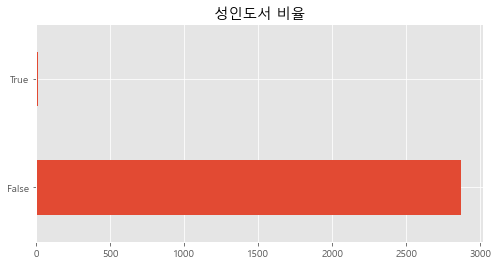

In [272]:
plt.style.use('ggplot')

df['adult'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('성인도서 비율')
plt.show()

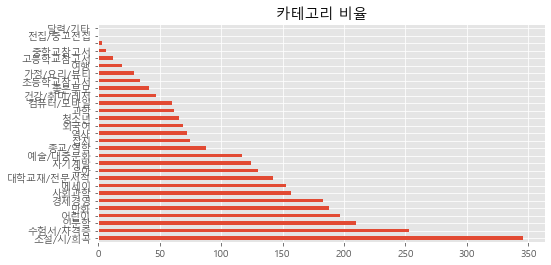

In [289]:
df1['categoryName'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('카테고리 비율')
plt.show()

In [288]:
df1['categoryName'].value_counts()

소설/시/희곡      346
수험서/자격증      253
인문학          210
어린이          197
만화           188
경제경영         183
사회과학         157
에세이          153
대학교재/전문서적    142
유아           130
자기계발         124
예술/대중문화      117
종교/역학         88
잡지            75
역사            72
외국어           69
청소년           66
과학            62
컴퓨터/모바일       60
건강/취미/레저      47
좋은부모          41
초등학교참고서       34
가정/요리/뷰티      29
여행            19
고등학교참고서       12
중학교참고서         6
               3
전집/중고전집        1
달력/기타          1
Name: categoryName, dtype: int64

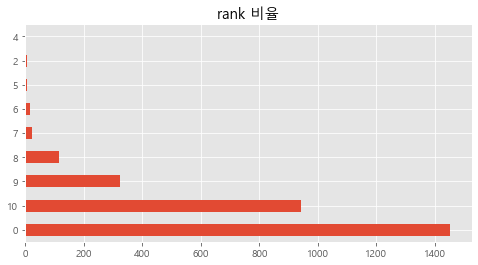

In [290]:
df1['rank'].value_counts().plot(kind = 'barh', figsize = (8,4))
plt.title('rank 비율')
plt.show()

# 3. 키워드 추출

In [303]:
results

'앤 서재 여성 작가 클래식 권 여자 글 쓰 혼자 여행 연애결혼 쉽 시대 제인 오스틴 그녀 예리 감각 언어 여성 사랑 결혼 마주 해야 현실 난관 치밀 그려냈'